In [1]:
INPUT_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/"
DATASET_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/"
video_dataset_folder = "/data/datasets/NTURGBD"
# ALREADY_PARSED_ACTION = [
#     "A001","A002","A006","A007","A008",
#     "A009","A023","A024","A026","A027",
#     "A031","A049","A035"]

ACTION_LABEL_SET = ["A{:03d}".format(i) for i in range(1,61) 
#                     if "A{:03d}".format(i) not in ALREADY_PARSED_ACTION
                   ]
# ACTION_LABEL_SET = ["A050","A051","A052","A053","A054","A055","A056","A057","A058","A059","A060"] # couple's action

# video_name_format = "S{:3d}C{:3d}P{:3d}R{:3d}A{:3d}_rgb.avi" #Setup-Camera-Performer-Replication-Action

# Summary of parsing

In [2]:
# SEED = 1234
import os
import random
from os import listdir, scandir
from os.path import isfile, isdir, join, exists


setupFolders = [f for f in listdir(video_dataset_folder) if isdir(join(video_dataset_folder, f)) and f[:13]=="nturgbd_rgb_s"]
print(setupFolders)
fileNames = []
fileEntries = []
for folder in setupFolders:
    setupEntryFiles = [f for f in scandir(join(video_dataset_folder,folder,"nturgb+d_rgb/")) 
                       if isfile(join(video_dataset_folder,folder,"nturgb+d_rgb/",f)) 
                       and any(label in f.name for label in ACTION_LABEL_SET)]
    fileEntries += setupEntryFiles
    
#     fileNames.append([f for f in listdir(join(dataset_folder,folder,"nturgb+d_rgb/")) 
#                        if isfile(join(dataset_folder,folder,"nturgb+d_rgb/",f)) 
#                        and any(label in f for label in ACTION_LABEL_SET)])
                       
    fileNames.append([f.name for f in setupEntryFiles])
        
fileNames = sum(fileNames, []) #making it in 1-row
print(len(fileNames)) 
# random.seed(SEED)
# random.shuffle(fileNames)

['nturgbd_rgb_s003', 'nturgbd_rgb_s008', 'nturgbd_rgb_s009', 'nturgbd_rgb_s005', 'nturgbd_rgb_s013', 'nturgbd_rgb_s001', 'nturgbd_rgb_s007', 'nturgbd_rgb_s015', 'nturgbd_rgb_s002', 'nturgbd_rgb_s004', 'nturgbd_rgb_s006', 'nturgbd_rgb_s010', 'nturgbd_rgb_s016', 'nturgbd_rgb_s017', 'nturgbd_rgb_s012', 'nturgbd_rgb_s011', 'nturgbd_rgb_s014']
56880


## Check that each action has been competely parsed

In [135]:
from os.path import exists
from os import listdir, scandir
import cv2

foldersPerVideo = [
    "Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x",
    "PoseNet-101"
#     "DensePoseKeyPointsMask_ResNet50_FPN_s1x-e2e"
]

totalMissingCounter = 0
totalCounter = 0
for actionLabel in ACTION_LABEL_SET:
    concernedFilePath = [f for f in fileEntries if actionLabel in f.name]
    notOkcounter = 0
    for file_entry in concernedFilePath:
#         video = cv2.VideoCapture(file_entry.path) # TROPPO LENTO MA PIÙ SICURO
#         video_length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

        video_folder_name = INPUT_FOLDER+file_entry.name[:-4]
        
        # check if the video folder has been created
        if not exists(video_folder_name): 
            notOkcounter += 1
            continue
        
    
        # check if all the model folders have the same number of files
        
        modelFolderPaths = [f.path for f in scandir(video_folder_name) if isdir(f)]
        # take the number of files of each model folder
        filesPerFolder = list(zip(map(lambda folder: len(listdir(folder)) ,modelFolderPaths),modelFolderPaths)) 
        
        if len(set([x[0] for x in filesPerFolder]))!=1:
            notOkcounter += 1
            continue
        
        for folder in foldersPerVideo:
            modelFolderPath = INPUT_FOLDER+file_entry.name[:-4]+"/"+folder
            # check if the model folder has been created
            if not exists(modelFolderPath): 
                notOkcounter += 1
                break
        
        
                
    totalMissingCounter += notOkcounter
    totalCounter += len(concernedFilePath)
    print ("{} {}/{}".format(actionLabel,len(concernedFilePath)-notOkcounter,len(concernedFilePath)))

print ("Global result: {}/{}".format(totalCounter-totalMissingCounter,totalCounter))

A001 948/948
A002 948/948
A003 948/948
A004 948/948
A005 948/948
A006 948/948
A007 948/948
A008 948/948
A009 948/948
A010 948/948
A011 948/948
A012 948/948
A013 948/948
A014 948/948
A015 948/948
A016 948/948
A017 948/948
A018 948/948
A019 948/948
A020 948/948
A021 948/948
A022 948/948
A023 948/948
A024 948/948
A025 948/948
A026 948/948
A027 948/948
A028 948/948
A029 948/948
A030 948/948
A031 948/948
A032 948/948
A033 948/948
A034 948/948
A035 948/948
A036 948/948
A037 948/948
A038 948/948
A039 948/948
A040 948/948
A041 948/948
A042 948/948
A043 948/948
A044 948/948
A045 948/948
A046 948/948
A047 948/948
A048 948/948
A049 948/948
A050 948/948
A051 948/948
A052 948/948
A053 948/948
A054 948/948
A055 948/948
A056 948/948
A057 948/948
A058 948/948
A059 948/948
A060 948/948
Global result: 56880/56880


# Creation of Dataset

In [2]:
import pickle
import numpy as np
import os
from os import scandir, listdir
from os.path import isfile, isdir, join, exists

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [3]:
import parse
from os.path import basename
folder_name_format = "S{:3d}C{:3d}P{:3d}R{:3d}A{:3d}_rgb" #Setup-Camera-Performer-Replication-Action
def getConfigurationFromFolderPath(folderPath):
    setup, camera, performer, replication, label = parse.parse(folder_name_format,basename(folderPath))
    return setup, camera, performer, replication, label

In [4]:
from scipy.spatial import distance

# /data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S013C003P027R001A054_rgb
# pose_scores_video, 
# keypoint_coords_video, 
# numberOfPosesToExtract
        

def extractBestPosesAlongTheVideoOLD(pose_scores_video, keypoint_coords_video, numberOfPosesToExtract):
    numberOfDetectedPeople = max([np.count_nonzero(i) for i in pose_scores_video])
    alignedCoords = np.zeros((len(pose_scores_video), numberOfDetectedPeople, 17, 2))
    alignedPoseScores = np.zeros((len(pose_scores_video), numberOfDetectedPeople))
    #     peopleLastCoords = keypoint_coords_video[0][:numberOfDetectedPeople]
    peopleLastCoords = np.zeros((numberOfDetectedPeople,17,2))
    for frame_idx, frame in enumerate(keypoint_coords_video):
        coordDistances = [] #triplet list -> distance, id_new_coords, id_person
        for newCoords_idx, newCoords in enumerate(frame):
            if np.count_nonzero(newCoords) == 0: # skip all the coords which are just zeros
                continue
            for person_idx, personLastCoords in enumerate(peopleLastCoords):
                coordinatesDistance = np.mean([distance.euclidean(newCoords[i],personLastCoords[i]) 
                                           for i in range(len(newCoords))
                                           if np.count_nonzero(newCoords[i]) == 2 
                                           and np.count_nonzero(personLastCoords[i]) == 2])
                # in case of poses which are all 0's
                if np.isnan(coordinatesDistance): 
                    coordinatesDistance = float("inf")

                coordDistances.append((coordinatesDistance,newCoords_idx,person_idx))

        # sort distances from te closest to the farest
        coordDistances.sort(key=lambda x : x[0]) 

        idNewCoords = [None for i in range(numberOfDetectedPeople)]
        for distance_triplet in coordDistances:
            person_idx = distance_triplet[2]
            newCoords_idx = distance_triplet[1]
            # check that the person doesn't have already a new coord and that the new coords are not already used  
            if idNewCoords[person_idx] == None and newCoords_idx not in idNewCoords:
                # assign new closest coords to people
                idNewCoords[person_idx] = newCoords_idx
                alignedCoords[frame_idx][person_idx] = frame[newCoords_idx]
                peopleLastCoords[person_idx] = frame[newCoords_idx]
                alignedPoseScores[frame_idx][person_idx] = pose_scores_video[frame_idx][newCoords_idx]


        # for the people who didn't find a match in the new coordinates we add a bunch of zeros in the result
        # without updating their last coordinates
        for person_idx, value in enumerate(idNewCoords):
            if value == None:
                alignedCoords[frame_idx][person_idx] = np.zeros((17,2))
                alignedPoseScores[frame_idx][person_idx] = 0


    # select the best poses
    scorePosesRank = np.mean(alignedPoseScores, axis=0)
    posesIndexRank = scorePosesRank.argsort()[::-1]

    isSecondPersonDetected = True
    if numberOfPosesToExtract == 1:
        bestPoseKeypointCoords = alignedCoords[:,posesIndexRank[0]]
    elif numberOfPosesToExtract == 2:
        if len(posesIndexRank) == 1:
            isSecondPersonDetected = False
            bestPoseKeypointCoords = np.concatenate((
                                                    alignedCoords[:,posesIndexRank[0]], 
                                                    np.zeros( #concatenate it with a bunch of zeros whit the same shape
                                                        alignedCoords[:,posesIndexRank[0]].shape
                                                    )),axis=1)
        else:
            bestPoseKeypointCoords = np.concatenate((
                                                    alignedCoords[:,posesIndexRank[0]], 
                                                    alignedCoords[:,posesIndexRank[1]]
                                                    ),axis=1)
    else:
        raise Exception("So far, it's possible to extract maximum 2 people from the video.") 

    return bestPoseKeypointCoords, isSecondPersonDetected


In [33]:
# np.asarray(pose_scores_video[idx_frame]).argsort()[::-1][:numberOfPosesToExtract]
# pose_scores_video

[array([0.9996611], dtype=float32),
 array([0.99967587], dtype=float32),
 array([0.99966276], dtype=float32),
 array([0.9996636], dtype=float32),
 array([0.99966264], dtype=float32),
 array([0.9996612], dtype=float32),
 array([0.9996513], dtype=float32),
 array([0.99966156], dtype=float32),
 array([0.99965584], dtype=float32),
 array([0.9996692], dtype=float32),
 array([0.9996741], dtype=float32),
 array([0.99969447], dtype=float32),
 array([0.9996792], dtype=float32),
 array([0.99967945], dtype=float32),
 array([0.99968266], dtype=float32),
 array([0.9996916], dtype=float32),
 array([0.9996921], dtype=float32),
 array([0.99969614], dtype=float32),
 array([0.99968433], dtype=float32),
 array([0.9996867], dtype=float32),
 array([0.9996804], dtype=float32),
 array([0.9996855], dtype=float32),
 array([0.9997008], dtype=float32),
 array([0.9996995], dtype=float32),
 array([0.9996927], dtype=float32),
 array([0.99965847], dtype=float32),
 array([0.9996667], dtype=float32),
 array([0.9996859

In [75]:
# keypoint_coords_video[59].shape
# type(pose_scores_video[59])
# np.count_nonzero(keypoint_coords_video[59])

34

In [77]:
# np.count_nonzero(keypoint_coords_video[idx_frame])

0

In [81]:
# New version
# pose_scores_video, keypoint_coords_video, numberOfPosesToExtract
#     xAxisIndex = 0
def extractBestPosesAlongTheVideo(pose_scores_video, keypoint_coords_video, numberOfPosesToExtract, xAxisIndex = 0):
    bestPosesOfVideo = np.zeros((len(pose_scores_video), numberOfPosesToExtract*17, 2), dtype=np.float32)
    peopleDetected = 0
    for idx_frame in range(len(pose_scores_video)):
        if np.count_nonzero(keypoint_coords_video[idx_frame]) == 0:
            bestPosesList = [np.zeros((17,2), dtype=np.float32)]
        else:
            # select best poses indexes
            indexBestPoses = np.asarray(pose_scores_video[idx_frame]).argsort()[::-1][:numberOfPosesToExtract]

            #extracting best poses
            bestPosesList = [keypoint_coords_video[idx_frame][idx_best_pose] for idx_best_pose in indexBestPoses]
            
        for missing in range(len(bestPosesList),numberOfPosesToExtract):
            bestPosesList.append(np.zeros((17,2), dtype=np.float32))
        # bestPoses = list(keypoint_coords_video[idx_frame][indexBestPoses])

        # sorting poses by mean X posistion
        bestPosesList.sort(key=lambda x: np.mean(x,axis=0)[xAxisIndex],reverse=True)

        bestPoses = np.asarray(bestPosesList)
        bestPoses = np.concatenate(bestPoses,axis=0)

        # append best poses
        bestPosesOfVideo[idx_frame] = bestPoses
        peopleDetected = max(peopleDetected,len(bestPoses))
    
    return bestPosesOfVideo, peopleDetected >= numberOfPosesToExtract

## PoseNet 

In [5]:
from os import scandir, listdir
from os.path import basename
# labelsToAnalyse = [54]
# inputFolder = "/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/"
# poseNetModelName = "PoseNet-101"


def getPoseNetResult(labelsToAnalyse, inputFolder = "/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/", poseNetModelName = "PoseNet-101"):
    print("retrieving PoseNet points from input folders...")
    videoFeaturesList = []
    videoLabelsList = []
    videoSetupList = []
    videoCameraList = []
    videoPerformerList = []
    videoReplicationList = []

    videoFoldersToAnalyse = [f.path for f in scandir(inputFolder) if isdir(join(inputFolder, f)) and getConfigurationFromFolderPath(f)[4] in labelsToAnalyse]

    print("found {} folders for {}".format(len(videoFoldersToAnalyse), poseNetModelName))
    for i,avf in enumerate(videoFoldersToAnalyse):
        if i% 100 == 0:
            print("{}/{}".format(i, len(videoFoldersToAnalyse)))

        # retrieve the target label from folder name
        setup, camera, performer, replication, target = getConfigurationFromFolderPath(avf)

        if target not in labelsToAnalyse:
            continue

        poseNet_folder = avf + "/"+ poseNetModelName
        pose_scores_video = []
    #     keypoint_scores_video = [] # ignoring for now
        keypoint_coords_video = []
        framesInFolder = [f for f in listdir(poseNet_folder)]
        framesInFolder.sort() # must be sorted to have the frame in the correct order   
        for frame_file in framesInFolder:
            with open(poseNet_folder+"/"+frame_file,'rb') as file_in:
                pose_scores, keypoint_scores, keypoint_coords = pickle.load(file_in)
            pose_scores_video.append(pose_scores)
    #         keypoint_scores_video.append(keypoint_scores) # for now ignoring the keypoints Scores
            keypoint_coords_video.append(keypoint_coords)

        numberOfPosesToExtract = 1 if target < 50 else 2

        bestPosesKeypointCoords, isSecondPersonDetected = extractBestPosesAlongTheVideo(pose_scores_video, 
                                                                keypoint_coords_video, 
                                                                numberOfPosesToExtract,
                                                                xAxisIndex=1)

        if not isSecondPersonDetected:
            print("The second person is not recognized in the whole video:", basename(avf))


        videoFeaturesList.append(bestPosesKeypointCoords)
        videoLabelsList.append(target)
        videoSetupList.append(setup)
        videoCameraList.append(camera)
        videoPerformerList.append(performer)
        videoReplicationList.append(replication)


    # converting to ndarray
    videoFeatures = np.asarray(videoFeaturesList)
    videoLabels = np.asarray(videoLabelsList)
    videoSetups = np.asarray(videoSetupList)
    videoCameras= np.asarray(videoCameraList)
    videoPerformers = np.asarray(videoPerformerList)
    videoReplications = np.asarray(videoReplicationList)

    # final assertion (just to be sure)
    assert len(videoFoldersToAnalyse) == len(videoFeatures) == len(videoLabels) == len(videoSetups) == len(videoCameras) == len(videoPerformers) == len(videoReplications)

    return videoFeatures,videoLabels,videoSetups,videoCameras,videoPerformers,videoReplications

In [20]:
i

0

## Detectron

In [80]:
#     labelsToAnalyse = list(range(1,61))
#     inputFolder = "/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/"
#     detectron2ModelName = "keypoint_rcnn_X_101_32x8d_FPN_3x"
def getDetectronResult(labelsToAnalyse, inputFolder = "/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/", detectron2ModelName = "keypoint_rcnn_X_101_32x8d_FPN_3x"):
    print("retrieving detectron points from input folders...")
    videoFeaturesList = []
    videoLabelsList = []
    videoSetupList = []
    videoCameraList = []
    videoPerformerList = []
    videoReplicationList = []

    videoFoldersToAnalyse = [f.path for f in scandir(inputFolder) if isdir(join(inputFolder, f)) and getConfigurationFromFolderPath(f)[4] in labelsToAnalyse]

    print("found {} folders for {}".format(len(videoFoldersToAnalyse), detectron2ModelName))

    for i, avf in enumerate(videoFoldersToAnalyse):
        if i% 100 == 0:
            print("{}/{}".format(i, len(videoFoldersToAnalyse)))

        # retrieve the target label from folder name
        setup, camera, performer, replication, target = getConfigurationFromFolderPath(avf)

        if target not in labelsToAnalyse:
            continue

        detectron2_folder = avf + "/Detectron2-"+ detectron2ModelName
        framesInFolder = [f for f in listdir(detectron2_folder)]
        framesInFolder.sort() # must be sorted to have the frame in the correct order   
        keypoint_coords_video = []
        pose_scores_video = []

        for fIdx,frame_file in enumerate(framesInFolder):
            with open(detectron2_folder+"/"+frame_file,'rb') as file_in:
                outputsRead = pickle.load(file_in)

            if len(outputsRead['instances']) == 0:
                # in case of no pose is detected we fill the features with zeros
                keypoints_frame = np.zeros((17,2))
                score_poses = [0]
                print(" for video {}-{} the frame {} is filled with zeros".format(i,basename(avf),fIdx))
            else:
                instancesDict = outputsRead['instances'].get_fields()
                keypoints_frame = np.array(instancesDict['pred_keypoints'].cpu()) 
                keypoints_frame = np.delete(keypoints_frame, 2, 2) #removing the third value of each keypoint (which I still don't understand what it means)
                score_poses = np.array(instancesDict['scores'].cpu()) 

            keypoint_coords_video.append(keypoints_frame)
            pose_scores_video.append(score_poses)


        numberOfPosesToExtract = 1 if target < 50 else 2
        
#         assert False,"stop here"
        try:
            bestPoses, isSecondPersonDetected = extractBestPosesAlongTheVideo(
                pose_scores_video, keypoint_coords_video, numberOfPosesToExtract
            )
        except:
            raise Exception("exception while analysing folder number",i,":",avf)
        
        if not isSecondPersonDetected:
            print("The second person is not recognized in the whole video:", basename(avf))
            

        videoFeaturesList.append(bestPoses)
        videoLabelsList.append(target)
        videoSetupList.append(setup)
        videoCameraList.append(camera)
        videoPerformerList.append(performer)
        videoReplicationList.append(replication)

    # converting to ndarray
    videoFeatures = np.asarray(videoFeaturesList)
    videoLabels = np.asarray(videoLabelsList)
    videoSetups = np.asarray(videoSetupList)
    videoCameras= np.asarray(videoCameraList)
    videoPerformers = np.asarray(videoPerformerList)
    videoReplications = np.asarray(videoReplicationList)

    #final assertion (just to be sure)
    assert len(videoFoldersToAnalyse) == len(videoFeatures) == len(videoLabels) == len(videoSetups) == len(videoCameras) == len(videoPerformers) == len(videoReplications)

    return videoFeatures,videoLabels,videoSetups,videoCameras,videoPerformers,videoReplications

## 8 ations PoseNet dataset

Posenet predicts: <br>
1 - nose <br>
2 - leftEye <br>
3 - rightEye <br>
4 - leftEar <br>
5 - rightEar <br>
6 - leftShoulder <br>
7 - rightShoulder <br>
8 - leftElbow <br>
9 - rightElbow <br>
10 - leftWrist <br>
11 - rightWrist <br>
12 - leftHip <br>
13 - rightHip <br>
14 - leftKnee <br>
15 - rightKnee <br>
16 - leftAnkle <br>
17 - rightAnkle

In [107]:
poseNetModelName = "PoseNet-101"
densePoseDatasetName = DATASET_FOLDER+poseNetModelName+"-dataset.pickle"
videoFeaturesList = []
videoLabelsList = []
videoSetupList = []
videoCameraList = []
videoPerformerList = []
videoReplicationList = []

for i,avf in enumerate(analysedVideoFolders):
    if i% 100 == 0:
        print("{}/{}".format(i, len(analysedVideoFolders)))
    
    # retrieve the target label from folder name
    setup, camera, performer, replication, target = parse.parse(video_folder_format,avf.split("/")[-1])
    
    if target not in ACTION_LABEL_SET:
        continue
    
    poseNet_folder = avf + "/"+ poseNetModelName
    pose_scores_video = []
#     keypoint_scores_video = [] # ignoring for now
    keypoint_coords_video = []
    framesInFolder = [f for f in listdir(poseNet_folder)]
    framesInFolder.sort() # must be sorted to have the frame in the correct order   
    for frame_file in framesInFolder:
        with open(poseNet_folder+"/"+frame_file,'rb') as file_in:
            pose_scores, keypoint_scores, keypoint_coords = pickle.load(file_in)
        pose_scores_video.append(pose_scores)
#         keypoint_scores_video.append(keypoint_scores) # for now ignoring the keypoints Scores
        keypoint_coords_video.append(keypoint_coords)
    
    # find the pose that along the whole video is the "surest"
    bestPoseIndex = np.argmax(np.mean(pose_scores_video, axis=0)) 
    
    # retrieving the keypoint coordinates for the best pose
    bestPoseKeypointCoords = [k[bestPoseIndex] for k in keypoint_coords_video] 
    
    
    videoFeaturesList.append(bestPoseKeypointCoords)
    videoLabelsList.append(target)
    videoSetupList.append(setup)
    videoCameraList.append(camera)
    videoPerformerList.append(performer)
    videoReplicationList.append(replication)

    
# saving dataset WITHOUT PADDING
videoFeatures = np.asarray(videoFeaturesList)
videoLabels = np.asarray(videoLabelsList)
videoSetups = np.asarray(videoSetupList)
videoCameras= np.asarray(videoCameraList)
videoPerformers = np.asarray(videoPerformerList)
videoReplications = np.asarray(videoReplicationList)

with open(densePoseDatasetName, 'wb') as handle:
    pickle.dump((videoFeatures, 
                 videoLabels,
                 videoSetups,
                 videoCameras,
                 videoPerformers,
                 videoReplications), handle, protocol=pickle.HIGHEST_PROTOCOL)
          
print("Done!")

NameError: name 'analysedVideoFolders' is not defined

In [9]:
poseNetModelName = "PoseNet-101"
densePoseDatasetName = DATASET_FOLDER+poseNetModelName+"-dataset.pickle"
with open(densePoseDatasetName,'rb') as file_in:
    readFeatures, readLabels, readSetups, readCameras, readPerformers, readReplications = pickle.load(file_in)

In [10]:
len(readLabels) 

7584

## 8 actions Detectron2 dataset

Detectron2 predicts: <br>
1 - nose <br>
2 - left_eye <br>
3 - right_eye <br>
4 - left_ear <br>
5 - right_ear <br>
6 - left_shoulder <br>
7 - right_shoulder <br>
8 - left_elbow <br>
9 - right_elbow <br>
10 - left_wrist <br>
11 - right_wrist <br>
12 - left_hip <br>
13 - right_hip <br>
14 - left_knee <br>
15 - right_knee <br>
16 - left_ankle <br>
17 - right_ankle

In [11]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [12]:
import cv2
import parse
import pickle
import torch, torchvision
print(torch.__version__)
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

1.3.1


In [13]:
detectron2ModelName = "keypoint_rcnn_X_101_32x8d_FPN_3x"
detectron2datasetName = DATASET_FOLDER+detectron2ModelName+"-dataset.pickle"
videoFeaturesList = []
videoLabelsList = []
videoSetupList = []
videoCameraList = []
videoPerformerList = []
videoReplicationList = []
for i, avf in enumerate(analysedVideoFolders):
    if i% 100 == 0:
        print("{}/{}".format(i, len(analysedVideoFolders)))
        
    # retrieve the target label from folder name
    setup, camera, performer, replication, target = parse.parse(video_folder_format,avf.split("/")[-1])
    
    if target not in ACTION_LABEL_SET:
        continue
        
    detectron2_folder = avf + "/Detectron2-"+ detectron2ModelName
    framesInFolder = [f for f in listdir(detectron2_folder)]
    framesInFolder.sort() # must be sorted to have the frame in the correct order   
    keypoints_video = []
    for frame_file in framesInFolder:
        with open(detectron2_folder+"/"+frame_file,'rb') as file_in:
            outputsRead = pickle.load(file_in)
#         if len(outputsRead['instances']) > 1:
#             print(detectron2_folder+"/"+frame_file, "has more than 1 pose")

        instancesFields = outputsRead['instances'].get_fields()

        # get only the most sure pose (Detectron sorts them for us)
        keypoints_frame = np.array(instancesFields['pred_keypoints'][0].cpu()) 
        keypoints_frame = [[k[0],k[1]] for k in keypoints_frame] #removing the third value (which I still didn't understand what it means)
        keypoints_video.append(keypoints_frame)

    videoFeaturesList.append(keypoints_video)
    videoLabelsList.append(target)
    videoSetupList.append(setup)
    videoCameraList.append(camera)
    videoPerformerList.append(performer)
    videoReplicationList.append(replication)

# saving dataset WITHOUT PADDING
videoFeatures = np.asarray(videoFeaturesList)
videoLabels = np.asarray(videoLabelsList)
videoSetups = np.asarray(videoSetupList)
videoCameras = np.asarray(videoCameraList)
videoPerformers = np.asarray(videoPerformerList)
videoReplications = np.asarray(videoReplicationList)

with open(detectron2datasetName, 'wb') as handle:
    pickle.dump((videoFeatures, 
                 videoLabels,
                 videoSetups,
                 videoCameras,
                 videoPerformers,
                 videoReplications), handle, protocol=pickle.HIGHEST_PROTOCOL)
         
print("Done!")

0/8532
100/8532
200/8532
300/8532
400/8532
500/8532
600/8532
700/8532
800/8532
900/8532
1000/8532
1100/8532
1200/8532
1300/8532
1400/8532
1500/8532
1600/8532
1700/8532
1800/8532
1900/8532
2000/8532
2100/8532
2200/8532
2300/8532
2400/8532
2500/8532
2600/8532
2700/8532
2800/8532
2900/8532
3000/8532
3100/8532
3200/8532
3300/8532
3400/8532
3500/8532
3600/8532
3700/8532
3800/8532
3900/8532
4000/8532
4100/8532
4200/8532
4300/8532
4400/8532
4500/8532
4600/8532
4700/8532
4800/8532
4900/8532
5000/8532
5100/8532
5200/8532
5300/8532
5400/8532
5500/8532
5600/8532
5700/8532
5800/8532
5900/8532
6000/8532
6100/8532
6200/8532
6300/8532
6400/8532
6500/8532
6600/8532
6700/8532
6800/8532
6900/8532
7000/8532
7100/8532
7200/8532
7300/8532
7400/8532
7500/8532
7600/8532
7700/8532
7800/8532
7900/8532
8000/8532
8100/8532
8200/8532
8300/8532
8400/8532
8500/8532
Done!


In [14]:
detectron2ModelName = "keypoint_rcnn_X_101_32x8d_FPN_3x"
detectron2datasetName = DATASET_FOLDER+detectron2ModelName+"-dataset.pickle"
with open(detectron2datasetName,'rb') as file_in:
    readFeaturesD2, readLabelsD2, readSetupsD2, readCamerasD2, readPerformersD2, readReplicationsD2 = pickle.load(file_in)
len(readLabelsD2)

7584

# Dataset Senesi-like

In [1]:
# INPUT_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/"
DATASET_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/"
# video_dataset_folder = "/data/datasets/NTURGBD"
# ACTION_LABEL_SET = ["A001","A002","A007","A008","A009","A031","A049","A023"] # mine
# ACTION_LABEL_SET = ["A006","A024","A026","A027","A035"] # different from Senesi
# ACTION_LABEL_SET = ["A007","A008","A009","A023","A031"] # common with Senesi
# ACTION_LABEL_SET = ["A006","A007","A008","A009","A023","A024","A026","A027","A031","A035"] # Senesi's
# video_name_format = "S{:3d}C{:3d}P{:3d}R{:3d}A{:3d}_rgb.avi" #Setup-Camera-Performer-Replication-Action

# Creating Senesi's dataset

In [32]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [33]:
def getStringList(labels, setups, cameras, performers, replications):
    strList = []
    for i in range(len(labels)):
        strList.append("{} {} {} {} {}".format(labels[i],setups[i],cameras[i],performers[i],replications[i]))
    return strList

In [34]:
import numpy as np
import pickle
from sklearn.model_selection import StratifiedShuffleSplit
from os.path import isdir,join

modelNames = ["keypoint_rcnn_X_101_32x8d_FPN_3x"
              ,"PoseNet-101"
             ]
labelInCommon = [7,8,9,23,31]
# ACTION_LABEL_SET = ["A006","A024","A026","A027","A035"] # different from Senesi
labelToReadFromInput = [6,24,26,27,35]
TEST_SIZE = 0.1
VAL_SIZE = 0.2
sss = None
for modelName in modelNames:
    print("### Model:",modelName,"###")
    datasetName = DATASET_FOLDER+modelName+"-dataset.pickle"
    print("### Loading",datasetName,"###")
    with open(datasetName,'rb') as file_in:
        readFeatures, readLabels, readSetups, readCameras, readPerformers, readReplications = pickle.load(file_in)

    indexToTake = np.concatenate(([np.where(readLabels == x)[0] for x in labelInCommon]))
    
    commonFeature = readFeatures[indexToTake]
    commonLabels = readLabels[indexToTake]
    commonSetup = readSetups[indexToTake]
    commonCameras = readCameras[indexToTake]
    commonPerformers = readPerformers[indexToTake]
    commonReplications = readReplications[indexToTake]
    
    assert 4740 == len(commonFeature) == len(commonLabels) == len(commonSetup) == len(commonCameras) == len(commonPerformers) == len(commonReplications)
    
    if modelName == "PoseNet-101":
        videoFeatures,videoLabels,videoSetups,videoCameras,videoPerformers,videoReplications = getPoseNetResult(labelToReadFromInput)
    elif modelName == "keypoint_rcnn_X_101_32x8d_FPN_3x":
            videoFeatures,videoLabels,videoSetups,videoCameras,videoPerformers,videoReplications = getDetectronResult(labelToReadFromInput)
    else:
        raise Exception("model name {} unknown".format(modelName)) 
    
    # MERGING COMMON ONES WITH READ ONES
    features = np.concatenate((commonFeature, videoFeatures))
    labels = np.concatenate((commonLabels, videoLabels))
    setups = np.concatenate((commonSetup, videoSetups))
    cameras = np.concatenate((commonCameras, videoCameras))
    performers = np.concatenate((commonPerformers, videoPerformers))
    replications = np.concatenate((commonReplications, videoReplications))
    
    globalSet = [features, labels, setups, cameras, performers, replications]
    
    # TRAIN-TEST splitting
    ## first splitting -> it will become reference
    if sss is None:
        print("### creating train-val-test set for the first time ###")
        sss = StratifiedShuffleSplit(n_splits=1, test_size=TEST_SIZE)
        for train_val_idx, test_idx in sss.split(features, labels):
            trainValSet = [el[train_val_idx] for el in globalSet]
            testSet = [el[test_idx] for el in globalSet]
        # TRAIN-VAL splitting
        sss = StratifiedShuffleSplit(n_splits=1, test_size=VAL_SIZE)
        for train_idx, val_idx in sss.split(trainValSet[0], trainValSet[1]):
            trainSet = [el[train_idx] for el in trainValSet]
            valSet = [el[val_idx] for el in trainValSet]
        
        stringListTrain = getStringList(*trainSet[1:])
        stringListVal = getStringList(*valSet[1:])
        stringListTest = getStringList(*testSet[1:])
        
    else:
        print("### creating train-val-test as the previous one ###")        
        stringListGlobal = getStringList(*globalSet[1:])

        print("get the indexes of train-val-test elements")
        train_idx = [stringListGlobal.index(el) for el in stringListTrain]
        val_idx = [stringListGlobal.index(el) for el in stringListVal]
        test_idx = [stringListGlobal.index(el) for el in stringListTest]

        print("creating the train-val-test set following the previously calculated indexes")
        trainSet = [el[train_idx] for el in globalSet]
        valSet = [el[val_idx] for el in globalSet]
        testSet = [el[test_idx] for el in globalSet]

    
    datasetResultName = DATASET_FOLDER+modelName+"-SPLIT-SENESI-dataset.pickle"
    print("Dumping the result in ",datasetResultName)
    with open(datasetResultName, 'wb') as handle:
        pickle.dump((trainSet, valSet, testSet), handle, protocol=pickle.HIGHEST_PROTOCOL)        
        
print("DONE!")

### Model: keypoint_rcnn_X_101_32x8d_FPN_3x ###
### Loading /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/keypoint_rcnn_X_101_32x8d_FPN_3x-dataset.pickle ###
retrieving detectron points from input folders...
found 4740 folders for keypoint_rcnn_X_101_32x8d_FPN_3x
0/4740
 for video 39-S014C002P039R002A006_rgb the frame 43 is filled with zeros
 for video 39-S014C002P039R002A006_rgb the frame 44 is filled with zeros
 for video 39-S014C002P039R002A006_rgb the frame 45 is filled with zeros
 for video 39-S014C002P039R002A006_rgb the frame 46 is filled with zeros
 for video 39-S014C002P039R002A006_rgb the frame 47 is filled with zeros
 for video 39-S014C002P039R002A006_rgb the frame 48 is filled with zeros
 for video 39-S014C002P039R002A006_rgb the frame 49 is filled with zeros
 for video 39-S014C002P039R002A006_rgb the frame 50 is filled with zeros
 for video 39-S014C002P039R002A006_rgb the frame 51 is filled with zeros
 for video 39-S014C002P039R002A006_rgb the frame 53 is

 for video 779-S014C003P015R001A006_rgb the frame 32 is filled with zeros
 for video 779-S014C003P015R001A006_rgb the frame 33 is filled with zeros
 for video 779-S014C003P015R001A006_rgb the frame 34 is filled with zeros
 for video 779-S014C003P015R001A006_rgb the frame 35 is filled with zeros
 for video 779-S014C003P015R001A006_rgb the frame 36 is filled with zeros
 for video 779-S014C003P015R001A006_rgb the frame 37 is filled with zeros
 for video 779-S014C003P015R001A006_rgb the frame 38 is filled with zeros
 for video 779-S014C003P015R001A006_rgb the frame 39 is filled with zeros
 for video 779-S014C003P015R001A006_rgb the frame 40 is filled with zeros
 for video 779-S014C003P015R001A006_rgb the frame 41 is filled with zeros
 for video 779-S014C003P015R001A006_rgb the frame 42 is filled with zeros
 for video 779-S014C003P015R001A006_rgb the frame 43 is filled with zeros
 for video 779-S014C003P015R001A006_rgb the frame 44 is filled with zeros
 for video 779-S014C003P015R001A006_rg

1200/4740
 for video 1258-S016C003P039R001A035_rgb the frame 38 is filled with zeros
 for video 1258-S016C003P039R001A035_rgb the frame 39 is filled with zeros
 for video 1258-S016C003P039R001A035_rgb the frame 40 is filled with zeros
 for video 1258-S016C003P039R001A035_rgb the frame 41 is filled with zeros
 for video 1258-S016C003P039R001A035_rgb the frame 42 is filled with zeros
 for video 1258-S016C003P039R001A035_rgb the frame 43 is filled with zeros
 for video 1258-S016C003P039R001A035_rgb the frame 44 is filled with zeros
 for video 1258-S016C003P039R001A035_rgb the frame 45 is filled with zeros
 for video 1258-S016C003P039R001A035_rgb the frame 46 is filled with zeros
 for video 1258-S016C003P039R001A035_rgb the frame 47 is filled with zeros
1300/4740
 for video 1315-S010C002P015R002A035_rgb the frame 24 is filled with zeros
1400/4740
 for video 1470-S002C002P012R002A006_rgb the frame 41 is filled with zeros
 for video 1470-S002C002P012R002A006_rgb the frame 42 is filled with z

2300/4740
 for video 2314-S010C002P007R002A035_rgb the frame 22 is filled with zeros
 for video 2314-S010C002P007R002A035_rgb the frame 23 is filled with zeros
 for video 2314-S010C002P007R002A035_rgb the frame 24 is filled with zeros
 for video 2314-S010C002P007R002A035_rgb the frame 25 is filled with zeros
 for video 2314-S010C002P007R002A035_rgb the frame 26 is filled with zeros
 for video 2314-S010C002P007R002A035_rgb the frame 27 is filled with zeros
 for video 2314-S010C002P007R002A035_rgb the frame 28 is filled with zeros
 for video 2314-S010C002P007R002A035_rgb the frame 29 is filled with zeros
 for video 2314-S010C002P007R002A035_rgb the frame 30 is filled with zeros
 for video 2314-S010C002P007R002A035_rgb the frame 31 is filled with zeros
 for video 2314-S010C002P007R002A035_rgb the frame 32 is filled with zeros
 for video 2314-S010C002P007R002A035_rgb the frame 33 is filled with zeros
 for video 2333-S013C003P025R001A035_rgb the frame 45 is filled with zeros
 for video 2333

3200/4740
3300/4740
3400/4740
 for video 3420-S006C002P001R002A035_rgb the frame 33 is filled with zeros
 for video 3420-S006C002P001R002A035_rgb the frame 34 is filled with zeros
 for video 3453-S017C002P016R002A006_rgb the frame 32 is filled with zeros
 for video 3453-S017C002P016R002A006_rgb the frame 33 is filled with zeros
 for video 3453-S017C002P016R002A006_rgb the frame 34 is filled with zeros
 for video 3453-S017C002P016R002A006_rgb the frame 35 is filled with zeros
 for video 3453-S017C002P016R002A006_rgb the frame 36 is filled with zeros
 for video 3453-S017C002P016R002A006_rgb the frame 37 is filled with zeros
 for video 3453-S017C002P016R002A006_rgb the frame 38 is filled with zeros
 for video 3453-S017C002P016R002A006_rgb the frame 39 is filled with zeros
 for video 3453-S017C002P016R002A006_rgb the frame 40 is filled with zeros
 for video 3453-S017C002P016R002A006_rgb the frame 41 is filled with zeros
 for video 3453-S017C002P016R002A006_rgb the frame 42 is filled with z

 for video 4366-S012C001P028R001A006_rgb the frame 24 is filled with zeros
 for video 4366-S012C001P028R001A006_rgb the frame 25 is filled with zeros
 for video 4366-S012C001P028R001A006_rgb the frame 26 is filled with zeros
 for video 4366-S012C001P028R001A006_rgb the frame 27 is filled with zeros
 for video 4366-S012C001P028R001A006_rgb the frame 28 is filled with zeros
 for video 4366-S012C001P028R001A006_rgb the frame 29 is filled with zeros
 for video 4366-S012C001P028R001A006_rgb the frame 30 is filled with zeros
 for video 4366-S012C001P028R001A006_rgb the frame 31 is filled with zeros
4400/4740
 for video 4479-S008C002P036R002A006_rgb the frame 36 is filled with zeros
4500/4740
4600/4740
 for video 4609-S014C003P015R001A035_rgb the frame 35 is filled with zeros
 for video 4609-S014C003P015R001A035_rgb the frame 36 is filled with zeros
 for video 4609-S014C003P015R001A035_rgb the frame 37 is filled with zeros
 for video 4609-S014C003P015R001A035_rgb the frame 38 is filled with z

## Check if the datasets are equal

In [2]:
DATASET_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/"

In [35]:
import pickle

dataset_1 = DATASET_FOLDER+"keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-SENESI-dataset.pickle"
print("Loading ",dataset_1)
with open(dataset_1,"rb") as file_in:
        trainSet_1, valSet_1, testSet_1 = pickle.load(file_in)

dataset_2 = DATASET_FOLDER+"PoseNet-101-SPLIT-SENESI-dataset.pickle"
print("Loading ",dataset_2)
with open(dataset_2,"rb") as file_in:
        trainSet_2, valSet_2, testSet_2 = pickle.load(file_in)

Loading  /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-SENESI-dataset.pickle
Loading  /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/PoseNet-101-SPLIT-SENESI-dataset.pickle


In [36]:
for i in range(1,6):
    print(i)
    assert all(trainSet_1[i] == trainSet_2[i])
    assert all(valSet_1[i] == valSet_2[i])
    assert all(testSet_1[i] == testSet_2[i])

1
2
3
4
5


## display balancing of splitting

In [37]:
import pickle

dataset_1 = DATASET_FOLDER+"keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-SENESI-dataset.pickle"
print("Loading ",dataset_1)
with open(dataset_1,"rb") as file_in:
        trainSet_1, valSet_1, testSet_1 = pickle.load(file_in)

dataset_2 = DATASET_FOLDER+"PoseNet-101-SPLIT-SENESI-dataset.pickle"
print("Loading ",dataset_2)
with open(dataset_2,"rb") as file_in:
        trainSet_2, valSet_2, testSet_2 = pickle.load(file_in)
print("Done!")

Loading  /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-SENESI-dataset.pickle
Loading  /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/PoseNet-101-SPLIT-SENESI-dataset.pickle


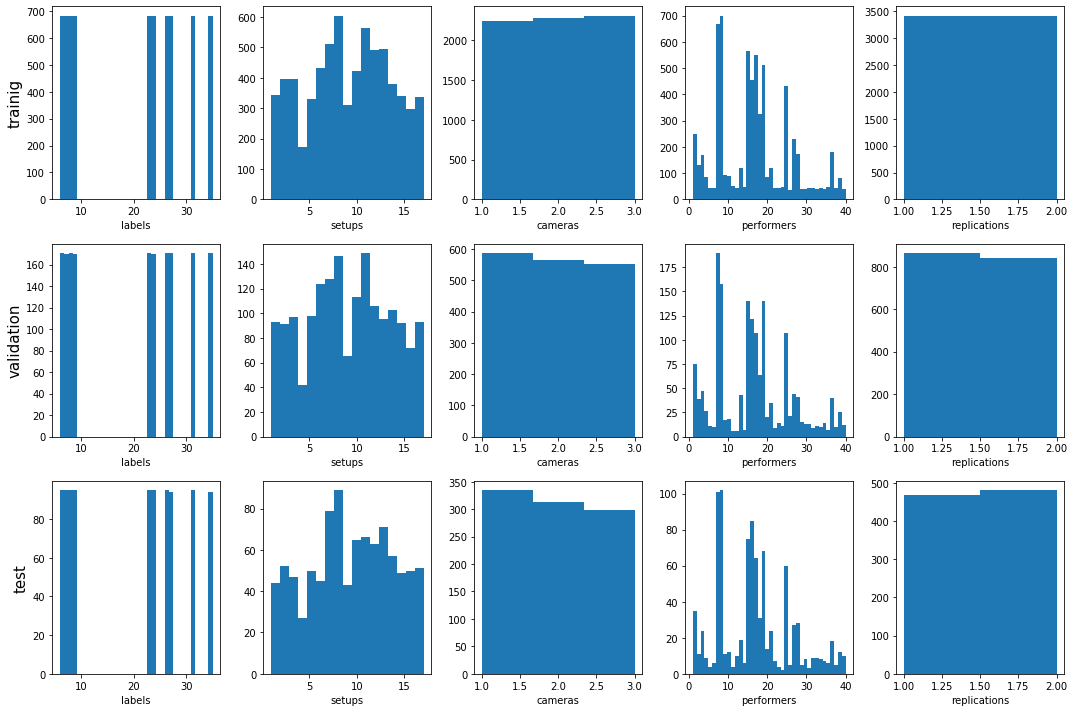

In [40]:
import matplotlib.pyplot as plt

xLabels = ["labels", "setups", "cameras", "performers", "replications"]
yLabels = ["trainig", "validation", "test"]
fig, axes = plt.subplots(nrows=3, ncols=5)
fig.set_size_inches(15,10)
for ids, dataSet in enumerate([trainSet_1, valSet_1, testSet_1]):
# for ids, dataSet in enumerate([trainSet_2, valSet_2, testSet_2]):
    axes[ids][0].set_ylabel(yLabels[ids],fontsize = 15)
    for iid, data in enumerate(dataSet[1:]):
        axes[ids][iid].set_xlabel(xLabels[iid],fontsize = 10)
        axes[ids][iid].hist(data, bins = max(data))
fig.tight_layout()
plt.show()

# splitting a dataset in train-val-test

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit
import pickle

TEST_SIZE = 0.1
VAL_SIZE = 0.2
modelNames = ["PoseNet-101","keypoint_rcnn_X_101_32x8d_FPN_3x"]
for modelName in modelNames:
    datasetName = DATASET_FOLDER+modelName+"-dataset.pickle"
    with open(datasetName,'rb') as file_in:
        readFeatures, readLabels, readSetups, readCameras, readPerformers, readReplications = pickle.load(file_in)

    readOnes = [readFeatures, readLabels, readSetups, readCameras, readPerformers, readReplications]
    # TRAIN-TEST splitting
    sss = StratifiedShuffleSplit(n_splits=1, test_size=TEST_SIZE)
    for train_idx, test_idx in sss.split(readFeatures, readLabels):
        trainValSet = [el[train_idx] for el in readOnes]
        testSet = [el[test_idx] for el in readOnes]
    # TRAIN-VAL splitting
    sss = StratifiedShuffleSplit(n_splits=1, test_size=VAL_SIZE)
    for train_idx, val_idx in sss.split(trainValSet[0], trainValSet[1]):
        trainSet = [el[train_idx] for el in trainValSet]
        valSet = [el[val_idx] for el in trainValSet]
        
    with open(DATASET_FOLDER+modelName+"-SPLIT-dataset.pickle", 'wb') as handle:
        pickle.dump((trainSet, valSet, testSet), handle, protocol=pickle.HIGHEST_PROTOCOL)



In [40]:
with open(DATASET_FOLDER+"keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle",'rb') as file_in:
    read_train_set, read_val_set, read_test_set = pickle.load(file_in)


In [41]:
len(read_train_set[0])+len(read_val_set[0])+len(read_test_set[0])

7584

In [42]:
len(read_train_set[0]), len(read_val_set[0]), len(read_test_set[0])

(5460, 1365, 759)

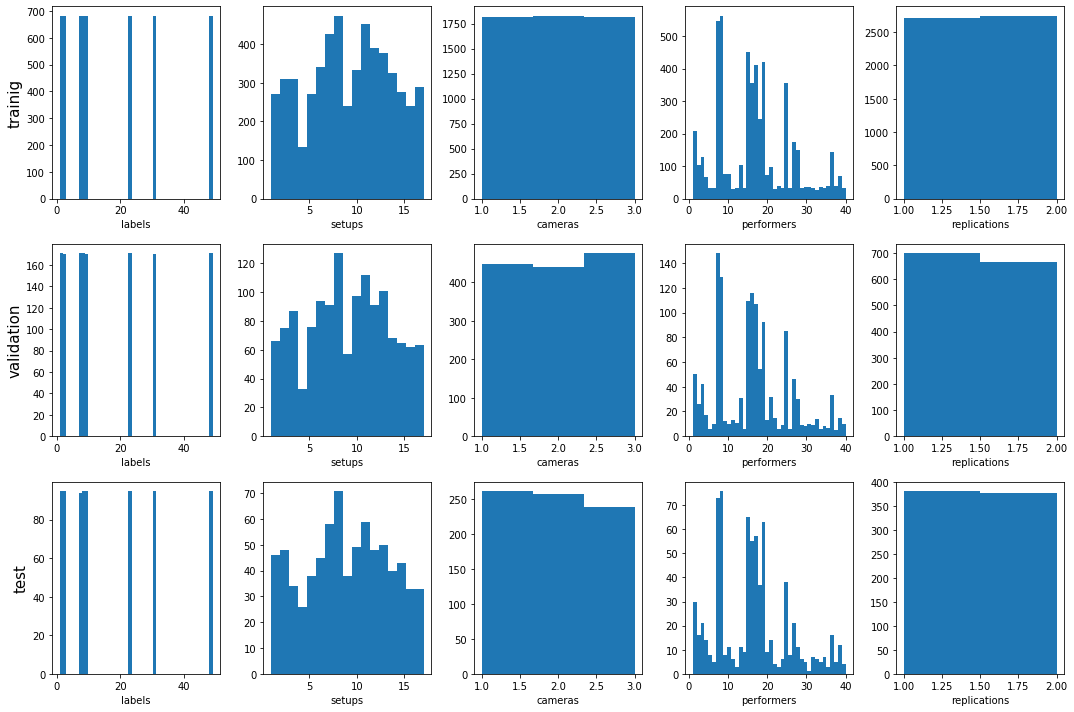

In [90]:
import matplotlib.pyplot as plt

xLabels = ["labels", "setups", "cameras", "performers", "replications"]
yLabels = ["trainig", "validation", "test"]
fig, axes = plt.subplots(nrows=3, ncols=5)
fig.set_size_inches(15,10)
for ids, dataSet in enumerate([read_train_set, read_val_set, read_test_set]):
    axes[ids][0].set_ylabel(yLabels[ids],fontsize = 15)
    for iid, data in enumerate(dataSet[1:]):
        axes[ids][iid].set_xlabel(xLabels[iid],fontsize = 10)
        axes[ids][iid].hist(data, bins = max(data))
fig.tight_layout()
plt.show()
        

# splitting dataset in same train-val-test as reference

In [46]:
from sklearn.model_selection import StratifiedShuffleSplit
import pickle
import numpy as np 

# referenceDataset = DATASET_FOLDER+"keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle"
referenceDataset = DATASET_FOLDER+"keypoint_rcnn_X_101_32x8d_FPN_3x-CROSS_VIEW-dataset.pickle"
incorrectDatasetDataset = DATASET_FOLDER+"PoseNet-101-CROSS_VIEW-dataset.pickle"
datasetResultName = DATASET_FOLDER+"PoseNet-101-CROSS_VIEW-dataset.pickle"

def getStringList(labels, setups, cameras, performers, replications):
    strList = []
    for i in range(len(labels)):
        strList.append("{} {} {} {} {}".format(labels[i],setups[i],cameras[i],performers[i],replications[i]))
    return strList

print("LOADING", referenceDataset, "AS REFERENCE")
with open(referenceDataset,"rb") as file_in:
        trainSet_ref, valSet_ref, testSet_ref = pickle.load(file_in)

stringListTrain = getStringList(*trainSet_ref[1:])
stringListVal = getStringList(*valSet_ref[1:])
stringListTest = getStringList(*testSet_ref[1:])

print("ADAPTING", incorrectDatasetDataset, "following the reference")
with open(incorrectDatasetDataset,"rb") as file_in:
    loadedDataset = pickle.load(file_in)
    readFeatures, readLabels, readSetups, readCameras, readPerformers, readReplications = np.concatenate(loadedDataset, axis=1)
#     readFeatures, readLabels, readSetups, readCameras, readPerformers, readReplications = pickle.load(file_in)

readOnes = [readFeatures, readLabels, readSetups, readCameras, readPerformers, readReplications]
stringListGlobal = getStringList(*readOnes[1:])

print("get the indexes of train-val-test elements")
train_idx = [stringListGlobal.index(el) for el in stringListTrain]
val_idx = [stringListGlobal.index(el) for el in stringListVal]
test_idx = [stringListGlobal.index(el) for el in stringListTest]

print("creating the train-val-test set following the previously calculated indexes")
trainSet = [el[train_idx] for el in readOnes]
valSet = [el[val_idx] for el in readOnes]
testSet = [el[test_idx] for el in readOnes]

print("Saving the results in", datasetResultName)
with open(datasetResultName, 'wb') as handle:
    pickle.dump((trainSet, valSet, testSet), handle, protocol=pickle.HIGHEST_PROTOCOL)

print("DONE!")

LOADING /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/keypoint_rcnn_X_101_32x8d_FPN_3x-CROSS_VIEW-dataset.pickle AS REFERENCE
ADAPTING /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/PoseNet-101-CROSS_VIEW-dataset.pickle following the reference
get the indexes of train-val-test elements
creating the train-val-test set following the previously calculated indexes
Saving the results in /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/PoseNet-101-CROSS_VIEW-dataset.pickle
DONE!


## check if the dataset are equal

In [43]:
# dataset_1 = DATASET_FOLDER+"keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle"
dataset_1 = DATASET_FOLDER+"keypoint_rcnn_X_101_32x8d_FPN_3x-CROSS_SUBJECT-dataset.pickle"
with open(dataset_1,"rb") as file_in:
        trainSet_1, valSet_1, testSet_1 = pickle.load(file_in)

# dataset_2 = DATASET_FOLDER+"PoseNet-101-SPLIT-dataset.pickle"
dataset_2 = DATASET_FOLDER+"PoseNet-101-CROSS_SUBJECT-dataset.pickle"
with open(dataset_2,"rb") as file_in:
        trainSet_2, valSet_2, testSet_2 = pickle.load(file_in)

In [44]:
all(trainSet_1[1] == trainSet_2[1])

True

In [45]:
trainSet_1[1],trainSet_2[1]

(array([20, 10, 28, ..., 45, 29, 15]),
 array([20, 10, 28, ..., 45, 29, 15], dtype=object))

# Building cross-view and cross-subject dataset 
### (as in the paper: https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Shahroudy_NTU_RGBD_A_CVPR_2016_paper.pdf)

In [2]:
DATASET_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/"

In [91]:
# for cross-subject
TRAINING_SUBJECTS = [1, 2, 4, 5, 8, 9, 13, 14, 15, 16, 17, 18, 19, 25, 27, 28, 31, 34, 35, 38]

#for cross-view
TRAINING_CAMERAS = [2, 3]

In [4]:
import numpy as np
def mergeSplitDatasets(splitDataset_1,splitDataset_2):
   
    print("from train_set-val_set-test_set to merged_set first dataset")
    mergedDataset_1 = np.concatenate(splitDataset_1, axis=1)

    print("from train_set-val_set-test_set to merged_set first dataset")
    mergedDataset_2 = np.concatenate(splitDataset_2, axis=1)

    print("Build hashset of first dataset")
    hashSet_1 = set([hash("{} {} {} {} {}".format(*elem)) for elem in zip(*mergedDataset_1[1:])])
    assert len(hashSet_1) == len(mergedDataset_1[0])
    hashSet_2 = set([hash("{} {} {} {} {}".format(*elem)) for elem in zip(*mergedDataset_2[1:])])
    assert len(hashSet_2) == len(mergedDataset_2[0])

    mergedDataset_1 = mergedDataset_1.tolist()
    print("Merging only new elements of second dataset")
    for rowIdx in range(len(mergedDataset_2[0])):
        row = mergedDataset_2[:,rowIdx]
        hashRow = hash("{} {} {} {} {}".format(*row[1:]))
        if hashRow not in hashSet_1:
            hashSet_1.add(hashRow)
            for columnIdx in range(len(mergedDataset_1)):
                mergedDataset_1[columnIdx].append(row[columnIdx])

    print("converting the lists of the merged dataset into arrays...")
    for columnIdx in range(len(mergedDataset_1)):
        mergedDataset_1[columnIdx] = np.asarray(mergedDataset_1[columnIdx])
        
    
    return mergedDataset_1 #features, labels, setups, cameras, performers, replications
    

In [5]:
def getSubset(dataset, requestedLabels):
    subsetDataset = [[] for i in range(len(dataset))]
    for i in range(len(dataset[1])): #the labels
        if dataset[1][i] in requestedLabels:
            for columnIdx in range(len(dataset)):
                    subsetDataset[columnIdx].append(dataset[columnIdx][i])
    
    for columnIdx in range(len(dataset)):
        subsetDataset[columnIdx] = np.asarray(subsetDataset[columnIdx])
        
    return subsetDataset
      

In [82]:
import pickle
from sklearn.model_selection import StratifiedShuffleSplit

VALIDATION_SET_PERCENTAGE = 0.2

loadFromDatasetName = "CROSS_VIEW-dataset.pickle"
# 	A20. put on a hat/cap.
# 	A21. take off a hat/cap.
# 	A30. typing on a keyboard.
# 	A31. pointing to something with finger.
# 	A32. taking a selfie.
# 	A35. nod head/bow.
# 	A36. shake head.
# 	A38. salute.
# 	A42. staggering.
# 	A44. touch head (headache).
# 	A56. giving something to other person.
# 	A58. handshaking.


# labelOfDatasetToBuild = [10, 11, 12, 16, 17, 23, 29, 30, 34, 49, 53, 57] # toughest cross_view
# # labelOfDatasetToBuild = [10, 11, 12, 16, 17, 29, 30, 31, 32, 34, 53, 57] # toughest cross_subject
# resultCrossSubjectSuffixDatasetName = "CROSS_SUBJECT_TOUGH-dataset.pickle"
# resultCrossViewSuffixDatasetName = "CROSS_VIEW_TOUGH-dataset.pickle"


labelOfDatasetToBuild = list(range(1,61)) # all actions
resultCrossSubjectSuffixDatasetName = "CROSS_SUBJECT-dataset.pickle"
resultCrossViewSuffixDatasetName = "CROSS_VIEW-dataset.pickle"

# labelOfDatasetToBuild = [6,7,8,9,23,24,26,27,31,35] # Senesi's
# labelOfDatasetToBuild = [1,2,7,8,9,23,31,49] # 8 actions


# labelOfDatasetToBuild = [1,2,6,7,8,9,23,24,26,27,31,35,49] # top+senesi cross_subject/view
# resultCrossSubjectSuffixDatasetName = "CROSS_SUBJECT_TOP+SENESI-dataset.pickle"
# resultCrossViewSuffixDatasetName = "CROSS_VIEW_TOP+SENESI-dataset.pickle"

# labelOfDatasetToBuild = [1,2,50] # test
# resultCrossSubjectSuffixDatasetName = "CROSS_SUBJECT_TEST-dataset.pickle"
# resultCrossViewSuffixDatasetName = "CROSS_VIEW_TEST-dataset.pickle"
    
# labelOfDatasetToBuild = [10,11,12,29,30,34,53,57] # mini cross_subject/view
# resultCrossSubjectSuffixDatasetName = "CROSS_SUBJECT_MINI-dataset.pickle"
# resultCrossViewSuffixDatasetName = "CROSS_VIEW_MINI-dataset.pickle"

def getStringList(labels, setups, cameras, performers, replications):
    strList = []
    for i in range(len(labels)):
        strList.append("{} {} {} {} {}".format(labels[i],setups[i],cameras[i],performers[i],replications[i]))
    return strList


sss=None
for modelName in ["keypoint_rcnn_X_101_32x8d_FPN_3x"]: #"PoseNet-101"
    
#     #### FROM MERGING OF TOP-MODELS and SENESI's ################################
#     print("Loading ",DATASET_FOLDER+modelName+"-SPLIT-dataset.pickle")
#     with open(DATASET_FOLDER+modelName+"-SPLIT-dataset.pickle","rb") as file_in:
#         splitDataset1 = pickle.load(file_in)
    
#     print("Loading ",DATASET_FOLDER+modelName+"-SPLIT-SENESI-dataset.pickle")
#     with open(DATASET_FOLDER+modelName+"-SPLIT-SENESI-dataset.pickle","rb") as file_in:
#         splitDataset2 = pickle.load(file_in)
    
#     print("Unifying datasets...")
#     loadedOnes = mergeSplitDatasets(splitDataset1,splitDataset2)
#     #################################################################
    
#     #### FROM PREVIOUS DATASET ################################
#     previousDatasetName = DATASET_FOLDER+modelName+"-"+loadFromDatasetName
#     print("Loading from",previousDatasetName)
#     with open(previousDatasetName,"rb") as file_in:
#         loadedDataset = pickle.load(file_in)
#     loadedOnes = np.concatenate(loadedDataset, axis=1)
#     ################################################################# 
    
    #### DON'T LOAD FROM A PREVIOUS DATASET ################################
    
    loadedOnes = [[] for i in range(6)]
    
    #######################################################################

    loadedFeatures, loadedLabels, loadedSetups, loadedCameras, loadedPerformers, loadedReplications = getSubset(loadedOnes,labelOfDatasetToBuild)
    
    assert modelName in ["PoseNet-101","keypoint_rcnn_X_101_32x8d_FPN_3x"], "model name {} unknown".format(modelName)
    
    if len(loadedLabels)>0:
        assert any([loadedlabel in labelOfDatasetToBuild for loadedlabel in loadedLabels]), "1 or more loaded label are not requested"
    
    
    labelsToReadFromInput = [l for l in labelOfDatasetToBuild if l not in set(loadedLabels)]
    videoFeatures,videoLabels,videoSetups,videoCameras,videoPerformers,videoReplications = [[] for i in range(6)]
    if len(labelsToReadFromInput) > 0:
        readerFunction = getPoseNetResult if modelName == "PoseNet-101" else getDetectronResult
        videoFeatures,videoLabels,videoSetups,videoCameras,videoPerformers,videoReplications = readerFunction(labelsToReadFromInput)  
    
    # MERGING LOADED ONES WITH READ ONES
    features = np.concatenate((loadedFeatures, videoFeatures)) 
    labels = np.concatenate((loadedLabels, videoLabels)).astype(int)
    setups = np.concatenate((loadedSetups, videoSetups)).astype(int)
    cameras = np.concatenate((loadedCameras, videoCameras)).astype(int)
    performers = np.concatenate((loadedPerformers, videoPerformers)).astype(int)
    replications = np.concatenate((loadedReplications, videoReplications)).astype(int)
    
    #CONVERTING FEATURE IN ARRAY OF ARRAYS
    for i in range(len(features)):
        features[i] = np.array(features[i])
    
    globalSet = [features, labels, setups, cameras, performers, replications]
    
    trainValSetSubject = [[] for i in range(6)]
    testSetSubject = [[] for i in range(6)]
    trainValSetView = [[] for i in range(6)]
    testSetView = [[] for i in range(6)]
    
    print("Building cross-subject and cross-view datasets...")
    for i in range(len(features)):
        
        #### Cross-Subject splitting ########
        targetDataset = trainValSetSubject if performers[i] in TRAINING_SUBJECTS else testSetSubject
        for featureIdx in range(6):
                targetDataset[featureIdx].append(globalSet[featureIdx][i])
        
        #### Cross-View splitting ########
        targetDataset = trainValSetView if cameras[i] in TRAINING_CAMERAS else testSetView
        for featureIdx in range(6):
                targetDataset[featureIdx].append(globalSet[featureIdx][i])
                
    print("converting the created lists into arrays...")
    for columnIdx in range(len(trainValSetSubject)):
        trainValSetSubject[columnIdx] = np.asarray(trainValSetSubject[columnIdx])
        testSetSubject[columnIdx] = np.asarray(testSetSubject[columnIdx])
        trainValSetView[columnIdx] = np.asarray(trainValSetView[columnIdx])
        testSetView[columnIdx] = np.asarray(testSetView[columnIdx])
    
    assert len(trainValSetSubject[0]) + len(testSetSubject[0]) == len(labelOfDatasetToBuild) * 948, "the length of the dataset you're creating is not correct"
    
    # TRAIN-TEST splitting
    ## first splitting -> it will become reference
    if sss is None:
        print("### creating train-val-test set for the first time ###")
        print("splitting the cross-subject set training part in train-val")
        sss = StratifiedShuffleSplit(n_splits=1, test_size=VALIDATION_SET_PERCENTAGE)
        for train_idx, val_idx in sss.split(trainValSetSubject[0], trainValSetSubject[1]):
            trainSetSubject = [el[train_idx] for el in trainValSetSubject]
            valSetSubject = [el[val_idx] for el in trainValSetSubject]
            
        refTrainSubject = getStringList(*trainSetSubject[1:])
        refValSubject = getStringList(*valSetSubject[1:])
        
        print("splitting the cross-view set training part in train-val")
        for train_idx, val_idx in sss.split(trainValSetView[0], trainValSetView[1]):
            trainSetView = [el[train_idx] for el in trainValSetView]
            valSetView = [el[val_idx] for el in trainValSetView]
            
        refTrainView = getStringList(*trainSetView[1:])
        refValView = getStringList(*valSetView[1:])
        
    else:
        print("### creating train-val-test as the previous one ###")       
        print("get the indexes of train-val elements for cross subject")
        stringGlobalSubject = getStringList(*trainValSetSubject[1:])
        train_idx = [stringGlobalSubject.index(el) for el in refTrainSubject]
        val_idx = [stringGlobalSubject.index(el) for el in refValSubject]

        print("creating the train-val set following the previously calculated indexes")
        trainSetSubject = [el[train_idx] for el in trainValSetSubject]
        valSetSubject = [el[val_idx] for el in trainValSetSubject]
        
        print("get the indexes of train-val elements for cross view")
        stringGlobalView = getStringList(*trainValSetView[1:])
        train_idx = [stringGlobalView.index(el) for el in refTrainView]
        val_idx = [stringGlobalView.index(el) for el in refValView]

        print("creating the train-val set following the previously calculated indexes")
        trainSetView = [el[train_idx] for el in trainValSetView]
        valSetView = [el[val_idx] for el in trainValSetView]
 
    
    #Converting the datasets in arrays
    trainSetSubject = np.array(trainSetSubject)
    valSetSubject = np.array(valSetSubject)
    testSetSubject = np.array(testSetSubject)
    trainSetView = np.array(trainSetView)
    valSetView = np.array(valSetView)
    testSetView = np.array(testSetView)
    
    print("Saving", DATASET_FOLDER+modelName+"-"+resultCrossSubjectSuffixDatasetName)
    with open(DATASET_FOLDER+modelName+"-"+resultCrossSubjectSuffixDatasetName, 'wb') as handle:
        pickle.dump((trainSetSubject, valSetSubject, testSetSubject), 
                    handle, protocol=pickle.HIGHEST_PROTOCOL)
        
        
    print("Saving", DATASET_FOLDER+modelName+"-"+resultCrossViewSuffixDatasetName)
    with open(DATASET_FOLDER+modelName+"-"+resultCrossViewSuffixDatasetName, 'wb') as handle:
        pickle.dump((trainSetView, valSetView, testSetView), 
                    handle, protocol=pickle.HIGHEST_PROTOCOL)
    
print("DONE!")   

retrieving detectron points from input folders...
found 56880 folders for keypoint_rcnn_X_101_32x8d_FPN_3x
0/56880
100/56880
200/56880
300/56880
 for video 326-S008C002P032R002A017_rgb the frame 60 is filled with zeros
 for video 326-S008C002P032R002A017_rgb the frame 61 is filled with zeros
 for video 326-S008C002P032R002A017_rgb the frame 65 is filled with zeros
 for video 326-S008C002P032R002A017_rgb the frame 66 is filled with zeros
 for video 326-S008C002P032R002A017_rgb the frame 67 is filled with zeros
 for video 326-S008C002P032R002A017_rgb the frame 68 is filled with zeros
 for video 326-S008C002P032R002A017_rgb the frame 69 is filled with zeros
 for video 326-S008C002P032R002A017_rgb the frame 92 is filled with zeros
 for video 326-S008C002P032R002A017_rgb the frame 93 is filled with zeros
 for video 326-S008C002P032R002A017_rgb the frame 104 is filled with zeros
 for video 326-S008C002P032R002A017_rgb the frame 105 is filled with zeros
 for video 326-S008C002P032R002A017_rgb

1600/56880
1700/56880
1800/56880
1900/56880
 for video 1937-S011C003P001R001A035_rgb the frame 23 is filled with zeros
2000/56880
2100/56880
2200/56880
2300/56880
2400/56880
2500/56880
2600/56880
2700/56880
2800/56880
 for video 2886-S013C002P015R002A048_rgb the frame 48 is filled with zeros
 for video 2886-S013C002P015R002A048_rgb the frame 49 is filled with zeros
2900/56880
3000/56880
3100/56880
3200/56880
3300/56880
3400/56880
3500/56880
3600/56880
3700/56880
 for video 3701-S011C001P028R001A016_rgb the frame 43 is filled with zeros
3800/56880
 for video 3819-S006C002P024R001A014_rgb the frame 59 is filled with zeros
3900/56880
4000/56880
 for video 4011-S012C002P015R001A043_rgb the frame 18 is filled with zeros
 for video 4084-S010C003P007R001A048_rgb the frame 71 is filled with zeros
 for video 4084-S010C003P007R001A048_rgb the frame 73 is filled with zeros
 for video 4084-S010C003P007R001A048_rgb the frame 106 is filled with zeros
 for video 4084-S010C003P007R001A048_rgb the fram

6400/56880
6500/56880
6600/56880
6700/56880
6800/56880
6900/56880
 for video 6923-S014C001P015R002A006_rgb the frame 48 is filled with zeros
7000/56880
 for video 7042-S013C003P028R001A043_rgb the frame 42 is filled with zeros
 for video 7042-S013C003P028R001A043_rgb the frame 43 is filled with zeros
 for video 7049-S016C003P021R001A035_rgb the frame 99 is filled with zeros
7100/56880
7200/56880
 for video 7231-S006C001P022R002A016_rgb the frame 61 is filled with zeros
7300/56880
 for video 7301-S011C002P015R002A006_rgb the frame 16 is filled with zeros
 for video 7301-S011C002P015R002A006_rgb the frame 17 is filled with zeros
 for video 7301-S011C002P015R002A006_rgb the frame 18 is filled with zeros
 for video 7301-S011C002P015R002A006_rgb the frame 19 is filled with zeros
 for video 7301-S011C002P015R002A006_rgb the frame 20 is filled with zeros
 for video 7301-S011C002P015R002A006_rgb the frame 21 is filled with zeros
 for video 7301-S011C002P015R002A006_rgb the frame 22 is filled w

 for video 8209-S011C002P002R002A017_rgb the frame 47 is filled with zeros
8300/56880
8400/56880
 for video 8499-S016C002P021R002A035_rgb the frame 59 is filled with zeros
 for video 8499-S016C002P021R002A035_rgb the frame 61 is filled with zeros
 for video 8499-S016C002P021R002A035_rgb the frame 62 is filled with zeros
 for video 8499-S016C002P021R002A035_rgb the frame 63 is filled with zeros
 for video 8499-S016C002P021R002A035_rgb the frame 64 is filled with zeros
 for video 8499-S016C002P021R002A035_rgb the frame 65 is filled with zeros
 for video 8499-S016C002P021R002A035_rgb the frame 66 is filled with zeros
 for video 8499-S016C002P021R002A035_rgb the frame 67 is filled with zeros
 for video 8499-S016C002P021R002A035_rgb the frame 68 is filled with zeros
 for video 8499-S016C002P021R002A035_rgb the frame 69 is filled with zeros
 for video 8499-S016C002P021R002A035_rgb the frame 70 is filled with zeros
 for video 8499-S016C002P021R002A035_rgb the frame 71 is filled with zeros
 fo

9600/56880
9700/56880
9800/56880
9900/56880
10000/56880
10100/56880
10200/56880
 for video 10211-S013C001P028R001A016_rgb the frame 42 is filled with zeros
 for video 10229-S012C003P017R002A014_rgb the frame 32 is filled with zeros
10300/56880
10400/56880
10500/56880
 for video 10574-S013C003P028R001A017_rgb the frame 29 is filled with zeros
 for video 10574-S013C003P028R001A017_rgb the frame 30 is filled with zeros
 for video 10574-S013C003P028R001A017_rgb the frame 31 is filled with zeros
 for video 10574-S013C003P028R001A017_rgb the frame 32 is filled with zeros
 for video 10574-S013C003P028R001A017_rgb the frame 33 is filled with zeros
 for video 10574-S013C003P028R001A017_rgb the frame 34 is filled with zeros
 for video 10574-S013C003P028R001A017_rgb the frame 35 is filled with zeros
 for video 10574-S013C003P028R001A017_rgb the frame 36 is filled with zeros
 for video 10574-S013C003P028R001A017_rgb the frame 37 is filled with zeros
 for video 10574-S013C003P028R001A017_rgb the fr

13300/56880
13400/56880
13500/56880
 for video 13516-S013C003P018R001A017_rgb the frame 29 is filled with zeros
 for video 13516-S013C003P018R001A017_rgb the frame 30 is filled with zeros
 for video 13516-S013C003P018R001A017_rgb the frame 31 is filled with zeros
 for video 13516-S013C003P018R001A017_rgb the frame 32 is filled with zeros
 for video 13516-S013C003P018R001A017_rgb the frame 33 is filled with zeros
 for video 13516-S013C003P018R001A017_rgb the frame 34 is filled with zeros
 for video 13516-S013C003P018R001A017_rgb the frame 35 is filled with zeros
 for video 13516-S013C003P018R001A017_rgb the frame 36 is filled with zeros
 for video 13516-S013C003P018R001A017_rgb the frame 37 is filled with zeros
 for video 13516-S013C003P018R001A017_rgb the frame 38 is filled with zeros
 for video 13516-S013C003P018R001A017_rgb the frame 39 is filled with zeros
 for video 13516-S013C003P018R001A017_rgb the frame 40 is filled with zeros
 for video 13516-S013C003P018R001A017_rgb the frame 

 for video 14790-S010C002P018R002A017_rgb the frame 17 is filled with zeros
 for video 14790-S010C002P018R002A017_rgb the frame 21 is filled with zeros
 for video 14790-S010C002P018R002A017_rgb the frame 22 is filled with zeros
 for video 14790-S010C002P018R002A017_rgb the frame 23 is filled with zeros
 for video 14790-S010C002P018R002A017_rgb the frame 24 is filled with zeros
 for video 14790-S010C002P018R002A017_rgb the frame 25 is filled with zeros
 for video 14790-S010C002P018R002A017_rgb the frame 26 is filled with zeros
 for video 14790-S010C002P018R002A017_rgb the frame 27 is filled with zeros
 for video 14790-S010C002P018R002A017_rgb the frame 28 is filled with zeros
 for video 14790-S010C002P018R002A017_rgb the frame 29 is filled with zeros
 for video 14790-S010C002P018R002A017_rgb the frame 30 is filled with zeros
 for video 14790-S010C002P018R002A017_rgb the frame 31 is filled with zeros
 for video 14790-S010C002P018R002A017_rgb the frame 32 is filled with zeros
 for video 1

18100/56880
 for video 18131-S012C001P015R001A006_rgb the frame 20 is filled with zeros
18200/56880
18300/56880
18400/56880
18500/56880
 for video 18547-S003C002P018R002A017_rgb the frame 33 is filled with zeros
 for video 18547-S003C002P018R002A017_rgb the frame 34 is filled with zeros
 for video 18547-S003C002P018R002A017_rgb the frame 35 is filled with zeros
 for video 18547-S003C002P018R002A017_rgb the frame 36 is filled with zeros
 for video 18547-S003C002P018R002A017_rgb the frame 37 is filled with zeros
18600/56880
18700/56880
 for video 18704-S008C003P029R001A016_rgb the frame 125 is filled with zeros
 for video 18704-S008C003P029R001A016_rgb the frame 126 is filled with zeros
 for video 18704-S008C003P029R001A016_rgb the frame 127 is filled with zeros
 for video 18704-S008C003P029R001A016_rgb the frame 128 is filled with zeros
 for video 18704-S008C003P029R001A016_rgb the frame 129 is filled with zeros
 for video 18704-S008C003P029R001A016_rgb the frame 130 is filled with zero

20800/56880
20900/56880
21000/56880
21100/56880
21200/56880
 for video 21227-S013C001P018R001A016_rgb the frame 35 is filled with zeros
 for video 21227-S013C001P018R001A016_rgb the frame 36 is filled with zeros
 for video 21227-S013C001P018R001A016_rgb the frame 65 is filled with zeros
 for video 21227-S013C001P018R001A016_rgb the frame 66 is filled with zeros
 for video 21227-S013C001P018R001A016_rgb the frame 67 is filled with zeros
 for video 21227-S013C001P018R001A016_rgb the frame 68 is filled with zeros
 for video 21227-S013C001P018R001A016_rgb the frame 69 is filled with zeros
 for video 21227-S013C001P018R001A016_rgb the frame 70 is filled with zeros
 for video 21227-S013C001P018R001A016_rgb the frame 71 is filled with zeros
 for video 21227-S013C001P018R001A016_rgb the frame 72 is filled with zeros
 for video 21227-S013C001P018R001A016_rgb the frame 73 is filled with zeros
 for video 21227-S013C001P018R001A016_rgb the frame 74 is filled with zeros
 for video 21245-S003C003P00

23500/56880
 for video 23556-S010C002P018R002A016_rgb the frame 23 is filled with zeros
 for video 23556-S010C002P018R002A016_rgb the frame 24 is filled with zeros
 for video 23556-S010C002P018R002A016_rgb the frame 25 is filled with zeros
 for video 23556-S010C002P018R002A016_rgb the frame 26 is filled with zeros
 for video 23556-S010C002P018R002A016_rgb the frame 27 is filled with zeros
 for video 23556-S010C002P018R002A016_rgb the frame 28 is filled with zeros
 for video 23556-S010C002P018R002A016_rgb the frame 29 is filled with zeros
 for video 23556-S010C002P018R002A016_rgb the frame 30 is filled with zeros
 for video 23556-S010C002P018R002A016_rgb the frame 31 is filled with zeros
 for video 23556-S010C002P018R002A016_rgb the frame 32 is filled with zeros
 for video 23556-S010C002P018R002A016_rgb the frame 33 is filled with zeros
 for video 23556-S010C002P018R002A016_rgb the frame 34 is filled with zeros
 for video 23556-S010C002P018R002A016_rgb the frame 35 is filled with zeros


25100/56880
 for video 25126-S017C003P015R001A017_rgb the frame 117 is filled with zeros
25200/56880
25300/56880
25400/56880
25500/56880
25600/56880
25700/56880
25800/56880
 for video 25887-S003C003P002R001A043_rgb the frame 44 is filled with zeros
 for video 25887-S003C003P002R001A043_rgb the frame 47 is filled with zeros
 for video 25887-S003C003P002R001A043_rgb the frame 48 is filled with zeros
25900/56880
 for video 25963-S013C003P015R001A006_rgb the frame 40 is filled with zeros
26000/56880
26100/56880
26200/56880
26300/56880
26400/56880
 for video 26486-S006C001P024R002A017_rgb the frame 54 is filled with zeros
 for video 26486-S006C001P024R002A017_rgb the frame 55 is filled with zeros
 for video 26486-S006C001P024R002A017_rgb the frame 57 is filled with zeros
 for video 26486-S006C001P024R002A017_rgb the frame 107 is filled with zeros
 for video 26486-S006C001P024R002A017_rgb the frame 113 is filled with zeros
 for video 26486-S006C001P024R002A017_rgb the frame 115 is filled wit

27900/56880
28000/56880
28100/56880
 for video 28126-S013C003P025R001A035_rgb the frame 45 is filled with zeros
 for video 28126-S013C003P025R001A035_rgb the frame 46 is filled with zeros
 for video 28126-S013C003P025R001A035_rgb the frame 47 is filled with zeros
 for video 28126-S013C003P025R001A035_rgb the frame 49 is filled with zeros
 for video 28126-S013C003P025R001A035_rgb the frame 50 is filled with zeros
 for video 28126-S013C003P025R001A035_rgb the frame 51 is filled with zeros
 for video 28126-S013C003P025R001A035_rgb the frame 52 is filled with zeros
 for video 28126-S013C003P025R001A035_rgb the frame 53 is filled with zeros
28200/56880
 for video 28251-S002C001P007R002A014_rgb the frame 27 is filled with zeros
28300/56880
 for video 28300-S013C002P018R002A016_rgb the frame 31 is filled with zeros
 for video 28300-S013C002P018R002A016_rgb the frame 33 is filled with zeros
 for video 28300-S013C002P018R002A016_rgb the frame 34 is filled with zeros
 for video 28300-S013C002P01

 for video 31530-S007C003P028R001A017_rgb the frame 40 is filled with zeros
 for video 31530-S007C003P028R001A017_rgb the frame 46 is filled with zeros
 for video 31567-S011C001P018R001A017_rgb the frame 25 is filled with zeros
31600/56880
 for video 31656-S011C003P018R001A016_rgb the frame 20 is filled with zeros
 for video 31656-S011C003P018R001A016_rgb the frame 23 is filled with zeros
 for video 31656-S011C003P018R001A016_rgb the frame 24 is filled with zeros
 for video 31656-S011C003P018R001A016_rgb the frame 25 is filled with zeros
 for video 31656-S011C003P018R001A016_rgb the frame 26 is filled with zeros
 for video 31656-S011C003P018R001A016_rgb the frame 27 is filled with zeros
 for video 31656-S011C003P018R001A016_rgb the frame 28 is filled with zeros
 for video 31656-S011C003P018R001A016_rgb the frame 54 is filled with zeros
 for video 31656-S011C003P018R001A016_rgb the frame 56 is filled with zeros
 for video 31656-S011C003P018R001A016_rgb the frame 58 is filled with zeros


33800/56880
33900/56880
34000/56880
34100/56880
34200/56880
34300/56880
 for video 34353-S017C002P015R002A016_rgb the frame 52 is filled with zeros
 for video 34353-S017C002P015R002A016_rgb the frame 53 is filled with zeros
 for video 34353-S017C002P015R002A016_rgb the frame 54 is filled with zeros
 for video 34353-S017C002P015R002A016_rgb the frame 55 is filled with zeros
 for video 34353-S017C002P015R002A016_rgb the frame 56 is filled with zeros
 for video 34353-S017C002P015R002A016_rgb the frame 57 is filled with zeros
 for video 34353-S017C002P015R002A016_rgb the frame 58 is filled with zeros
 for video 34353-S017C002P015R002A016_rgb the frame 59 is filled with zeros
 for video 34353-S017C002P015R002A016_rgb the frame 61 is filled with zeros
 for video 34353-S017C002P015R002A016_rgb the frame 62 is filled with zeros
 for video 34353-S017C002P015R002A016_rgb the frame 63 is filled with zeros
 for video 34353-S017C002P015R002A016_rgb the frame 64 is filled with zeros
 for video 34353

35000/56880
 for video 35061-S014C002P039R002A035_rgb the frame 39 is filled with zeros
 for video 35061-S014C002P039R002A035_rgb the frame 40 is filled with zeros
 for video 35061-S014C002P039R002A035_rgb the frame 41 is filled with zeros
 for video 35061-S014C002P039R002A035_rgb the frame 42 is filled with zeros
 for video 35061-S014C002P039R002A035_rgb the frame 43 is filled with zeros
 for video 35061-S014C002P039R002A035_rgb the frame 45 is filled with zeros
 for video 35061-S014C002P039R002A035_rgb the frame 46 is filled with zeros
 for video 35061-S014C002P039R002A035_rgb the frame 47 is filled with zeros
 for video 35061-S014C002P039R002A035_rgb the frame 48 is filled with zeros
 for video 35061-S014C002P039R002A035_rgb the frame 49 is filled with zeros
 for video 35061-S014C002P039R002A035_rgb the frame 50 is filled with zeros
 for video 35061-S014C002P039R002A035_rgb the frame 51 is filled with zeros
 for video 35061-S014C002P039R002A035_rgb the frame 52 is filled with zeros


38000/56880
38100/56880
 for video 38104-S006C003P001R002A014_rgb the frame 34 is filled with zeros
 for video 38104-S006C003P001R002A014_rgb the frame 52 is filled with zeros
 for video 38104-S006C003P001R002A014_rgb the frame 53 is filled with zeros
 for video 38104-S006C003P001R002A014_rgb the frame 54 is filled with zeros
 for video 38104-S006C003P001R002A014_rgb the frame 55 is filled with zeros
 for video 38104-S006C003P001R002A014_rgb the frame 56 is filled with zeros
 for video 38104-S006C003P001R002A014_rgb the frame 57 is filled with zeros
 for video 38104-S006C003P001R002A014_rgb the frame 58 is filled with zeros
 for video 38104-S006C003P001R002A014_rgb the frame 59 is filled with zeros
 for video 38104-S006C003P001R002A014_rgb the frame 60 is filled with zeros
 for video 38104-S006C003P001R002A014_rgb the frame 61 is filled with zeros
 for video 38104-S006C003P001R002A014_rgb the frame 62 is filled with zeros
 for video 38104-S006C003P001R002A014_rgb the frame 63 is filled

42200/56880
 for video 42288-S017C003P016R001A035_rgb the frame 31 is filled with zeros
 for video 42288-S017C003P016R001A035_rgb the frame 32 is filled with zeros
 for video 42288-S017C003P016R001A035_rgb the frame 33 is filled with zeros
 for video 42288-S017C003P016R001A035_rgb the frame 34 is filled with zeros
42300/56880
 for video 42327-S011C003P015R001A035_rgb the frame 21 is filled with zeros
 for video 42327-S011C003P015R001A035_rgb the frame 22 is filled with zeros
 for video 42327-S011C003P015R001A035_rgb the frame 23 is filled with zeros
 for video 42327-S011C003P015R001A035_rgb the frame 24 is filled with zeros
 for video 42327-S011C003P015R001A035_rgb the frame 25 is filled with zeros
 for video 42327-S011C003P015R001A035_rgb the frame 27 is filled with zeros
42400/56880
 for video 42451-S012C002P028R001A016_rgb the frame 26 is filled with zeros
 for video 42451-S012C002P028R001A016_rgb the frame 28 is filled with zeros
 for video 42451-S012C002P028R001A016_rgb the frame 

44700/56880
44800/56880
44900/56880
 for video 44992-S015C003P015R001A035_rgb the frame 38 is filled with zeros
 for video 44992-S015C003P015R001A035_rgb the frame 39 is filled with zeros
 for video 44992-S015C003P015R001A035_rgb the frame 40 is filled with zeros
 for video 44992-S015C003P015R001A035_rgb the frame 41 is filled with zeros
 for video 44992-S015C003P015R001A035_rgb the frame 44 is filled with zeros
 for video 44992-S015C003P015R001A035_rgb the frame 45 is filled with zeros
 for video 44992-S015C003P015R001A035_rgb the frame 46 is filled with zeros
 for video 44992-S015C003P015R001A035_rgb the frame 47 is filled with zeros
 for video 44992-S015C003P015R001A035_rgb the frame 49 is filled with zeros
 for video 44992-S015C003P015R001A035_rgb the frame 50 is filled with zeros
45000/56880
45100/56880
45200/56880
45300/56880
45400/56880
45500/56880
45600/56880
45700/56880
 for video 45776-S016C002P007R002A016_rgb the frame 73 is filled with zeros
 for video 45776-S016C002P007R00

 for video 47003-S017C002P015R002A017_rgb the frame 36 is filled with zeros
 for video 47003-S017C002P015R002A017_rgb the frame 41 is filled with zeros
 for video 47003-S017C002P015R002A017_rgb the frame 42 is filled with zeros
 for video 47003-S017C002P015R002A017_rgb the frame 43 is filled with zeros
 for video 47003-S017C002P015R002A017_rgb the frame 44 is filled with zeros
 for video 47003-S017C002P015R002A017_rgb the frame 45 is filled with zeros
 for video 47003-S017C002P015R002A017_rgb the frame 46 is filled with zeros
 for video 47003-S017C002P015R002A017_rgb the frame 47 is filled with zeros
 for video 47003-S017C002P015R002A017_rgb the frame 48 is filled with zeros
 for video 47003-S017C002P015R002A017_rgb the frame 49 is filled with zeros
 for video 47003-S017C002P015R002A017_rgb the frame 51 is filled with zeros
 for video 47003-S017C002P015R002A017_rgb the frame 52 is filled with zeros
 for video 47003-S017C002P015R002A017_rgb the frame 53 is filled with zeros
 for video 4

 for video 48191-S016C003P039R001A016_rgb the frame 147 is filled with zeros
 for video 48191-S016C003P039R001A016_rgb the frame 148 is filled with zeros
 for video 48191-S016C003P039R001A016_rgb the frame 149 is filled with zeros
 for video 48191-S016C003P039R001A016_rgb the frame 150 is filled with zeros
 for video 48191-S016C003P039R001A016_rgb the frame 151 is filled with zeros
 for video 48191-S016C003P039R001A016_rgb the frame 152 is filled with zeros
 for video 48191-S016C003P039R001A016_rgb the frame 153 is filled with zeros
 for video 48191-S016C003P039R001A016_rgb the frame 154 is filled with zeros
 for video 48191-S016C003P039R001A016_rgb the frame 155 is filled with zeros
 for video 48191-S016C003P039R001A016_rgb the frame 156 is filled with zeros
 for video 48191-S016C003P039R001A016_rgb the frame 157 is filled with zeros
 for video 48191-S016C003P039R001A016_rgb the frame 158 is filled with zeros
 for video 48191-S016C003P039R001A016_rgb the frame 159 is filled with zeros

 for video 49428-S011C003P028R001A016_rgb the frame 71 is filled with zeros
 for video 49428-S011C003P028R001A016_rgb the frame 72 is filled with zeros
 for video 49428-S011C003P028R001A016_rgb the frame 73 is filled with zeros
 for video 49428-S011C003P028R001A016_rgb the frame 74 is filled with zeros
 for video 49428-S011C003P028R001A016_rgb the frame 75 is filled with zeros
 for video 49428-S011C003P028R001A016_rgb the frame 76 is filled with zeros
 for video 49428-S011C003P028R001A016_rgb the frame 77 is filled with zeros
49500/56880
49600/56880
 for video 49637-S012C003P018R001A016_rgb the frame 34 is filled with zeros
 for video 49637-S012C003P018R001A016_rgb the frame 35 is filled with zeros
 for video 49637-S012C003P018R001A016_rgb the frame 39 is filled with zeros
 for video 49637-S012C003P018R001A016_rgb the frame 41 is filled with zeros
 for video 49637-S012C003P018R001A016_rgb the frame 42 is filled with zeros
 for video 49637-S012C003P018R001A016_rgb the frame 43 is filled

51600/56880
 for video 51667-S011C001P008R002A006_rgb the frame 40 is filled with zeros
 for video 51667-S011C001P008R002A006_rgb the frame 41 is filled with zeros
 for video 51667-S011C001P008R002A006_rgb the frame 42 is filled with zeros
 for video 51667-S011C001P008R002A006_rgb the frame 43 is filled with zeros
51700/56880
51800/56880
51900/56880
52000/56880
 for video 52011-S013C002P008R002A048_rgb the frame 55 is filled with zeros
 for video 52011-S013C002P008R002A048_rgb the frame 56 is filled with zeros
 for video 52011-S013C002P008R002A048_rgb the frame 57 is filled with zeros
 for video 52011-S013C002P008R002A048_rgb the frame 63 is filled with zeros
 for video 52011-S013C002P008R002A048_rgb the frame 101 is filled with zeros
 for video 52011-S013C002P008R002A048_rgb the frame 110 is filled with zeros
 for video 52011-S013C002P008R002A048_rgb the frame 111 is filled with zeros
52100/56880
52200/56880
 for video 52240-S013C001P025R002A043_rgb the frame 39 is filled with zeros
 

55300/56880
55400/56880
55500/56880
55600/56880
55700/56880
 for video 55731-S011C002P028R002A016_rgb the frame 32 is filled with zeros
 for video 55731-S011C002P028R002A016_rgb the frame 33 is filled with zeros
 for video 55731-S011C002P028R002A016_rgb the frame 34 is filled with zeros
 for video 55731-S011C002P028R002A016_rgb the frame 35 is filled with zeros
 for video 55731-S011C002P028R002A016_rgb the frame 36 is filled with zeros
 for video 55731-S011C002P028R002A016_rgb the frame 37 is filled with zeros
 for video 55731-S011C002P028R002A016_rgb the frame 38 is filled with zeros
 for video 55731-S011C002P028R002A016_rgb the frame 39 is filled with zeros
 for video 55731-S011C002P028R002A016_rgb the frame 40 is filled with zeros
 for video 55731-S011C002P028R002A016_rgb the frame 41 is filled with zeros
 for video 55731-S011C002P028R002A016_rgb the frame 42 is filled with zeros
 for video 55731-S011C002P028R002A016_rgb the frame 43 is filled with zeros
 for video 55731-S011C002P02

 for video 56282-S007C003P007R002A014_rgb the frame 39 is filled with zeros
56300/56880
 for video 56399-S009C003P015R001A006_rgb the frame 38 is filled with zeros
 for video 56399-S009C003P015R001A006_rgb the frame 39 is filled with zeros
 for video 56399-S009C003P015R001A006_rgb the frame 40 is filled with zeros
 for video 56399-S009C003P015R001A006_rgb the frame 41 is filled with zeros
56400/56880
56500/56880
 for video 56582-S013C003P015R001A016_rgb the frame 83 is filled with zeros
 for video 56582-S013C003P015R001A016_rgb the frame 84 is filled with zeros
 for video 56582-S013C003P015R001A016_rgb the frame 85 is filled with zeros
 for video 56582-S013C003P015R001A016_rgb the frame 86 is filled with zeros
 for video 56582-S013C003P015R001A016_rgb the frame 88 is filled with zeros
 for video 56582-S013C003P015R001A016_rgb the frame 89 is filled with zeros
 for video 56582-S013C003P015R001A016_rgb the frame 90 is filled with zeros
 for video 56582-S013C003P015R001A016_rgb the frame 

In [20]:
import pickle
# loadFromDatasetName = "CROSS_SUBJECT_MINI-dataset.pickle" # training-test -> 40320 - 16560
# loadFromDatasetName = "CROSS_VIEW_MINI-dataset.pickle" # training-test -> 37920 - 18960

loadFromDatasetName = "CROSS_SUBJECT_TOP+SENESI-dataset.pickle" # training-test -> 40320 - 16560
# loadFromDatasetName = "CROSS_VIEW_TOP+SENESI-dataset.pickle" # training-test -> 37920 - 18960

modelName = "PoseNet-101"
previousDatasetName = DATASET_FOLDER+modelName+"-"+loadFromDatasetName
print("Loading from",previousDatasetName)
with open(previousDatasetName,"rb") as file_in:
    trainSet, valSet, testSet = pickle.load(file_in)

Loading from /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/PoseNet-101-CROSS_SUBJECT_TOP+SENESI-dataset.pickle


## Check corectness of splitting

In [11]:
def checkCorrectnessDatasetCrossSubject(splitDataset, TRAINING_SUBJECTS = [1, 2, 4, 5, 8, 9, 13, 14, 15, 16, 17, 18, 19, 25, 27, 28, 31, 34, 35, 38]):
    train_set, val_set, test_set = splitDataset
    print("checking train-val sets...")
    elemIdx = 4 #idx of subject
    listValTrain = set(train_set[elemIdx])
    listValTrain.update(set(val_set[elemIdx]))
    listValTrain = list(listValTrain)
    listValTrain.sort()
    TRAINING_SUBJECTS.sort()
    assert TRAINING_SUBJECTS == listValTrain
    
    print("checking test set...")
    TEST_SUBJECT = list(set(range(1,41)) - set(TRAINING_SUBJECTS))
    TEST_SUBJECT.sort()
    subjTest = list(set(test_set[elemIdx]))
    subjTest.sort()
    assert subjTest == TEST_SUBJECT
    
def checkCorrectnessDatasetCrossView(splitDataset, TRAINING_CAMERAS = [2, 3]):
    train_set, val_set, test_set = splitDataset
    print("checking train-val sets...")
    elemIdx = 3 #idx of camera
    listValTrain = set(train_set[elemIdx])
    listValTrain.update(set(val_set[elemIdx]))
    listValTrain = list(listValTrain)
    listValTrain.sort()
    TRAINING_CAMERAS.sort()
    assert TRAINING_CAMERAS == listValTrain
    
    print("checking test set...")
    TEST_CAMERAS = list(set(range(1,4)) - set(TRAINING_CAMERAS))
    TEST_CAMERAS.sort()
    cameraTest = list(set(test_set[elemIdx]))
    cameraTest.sort()
    assert cameraTest == TEST_CAMERAS


In [12]:
type_of_cross_subj_dataset = "CROSS_SUBJECT-dataset.pickle"
type_of_cross_view_dataset = "CROSS_VIEW-dataset.pickle"
with open(DATASET_FOLDER+"PoseNet-101-"+type_of_cross_subj_dataset,"rb") as file_in:
        posenetCrossSubjectSplit = pickle.load(file_in)
checkCorrectnessDatasetCrossSubject(posenetCrossSubjectSplit)

with open(DATASET_FOLDER+"PoseNet-101-"+type_of_cross_view_dataset,"rb") as file_in:
        posenetCrossViewSplit = pickle.load(file_in)
checkCorrectnessDatasetCrossView(posenetCrossViewSplit)  

with open(DATASET_FOLDER+"keypoint_rcnn_X_101_32x8d_FPN_3x-"+type_of_cross_subj_dataset,"rb") as file_in:
        detectronCrossSubjectSplit = pickle.load(file_in)
checkCorrectnessDatasetCrossSubject(detectronCrossSubjectSplit)

with open(DATASET_FOLDER+"keypoint_rcnn_X_101_32x8d_FPN_3x-"+type_of_cross_view_dataset,"rb") as file_in:
        detectronCrossViewSplit = pickle.load(file_in)
checkCorrectnessDatasetCrossView(detectronCrossViewSplit)  
print("DONE")

checking train-val sets...
checking test set...
checking train-val sets...
checking test set...
checking train-val sets...
checking test set...
checking train-val sets...
checking test set...
DONE


In [13]:
#check that the dataset are equally split

import pickle

# ### LOADING FROM FILE #################################################################
# dataset_1 = DATASET_FOLDER+"keypoint_rcnn_X_101_32x8d_FPN_3x-CROSS_VIEW-dataset.pickle"
# print("Loading ",dataset_1)
# with open(dataset_1,"rb") as file_in:
#         trainSet_1, valSet_1, testSet_1 = pickle.load(file_in)
        

# dataset_2 = DATASET_FOLDER+"PoseNet-101-CROSS_VIEW-dataset.pickle"
# print("Loading ",dataset_2)
# with open(dataset_2,"rb") as file_in:
#         trainSet_2, valSet_2, testSet_2 = pickle.load(file_in)
        

# dataset_3 = DATASET_FOLDER+"keypoint_rcnn_X_101_32x8d_FPN_3x-CROSS_SUBJECT-dataset.pickle"
# print("Loading ",dataset_3)
# with open(dataset_3,"rb") as file_in:
#         trainSet_3, valSet_3, testSet_3 = pickle.load(file_in)

# dataset_4 = DATASET_FOLDER+"PoseNet-101-CROSS_SUBJECT-dataset.pickle"
# print("Loading ",dataset_4)
# with open(dataset_4,"rb") as file_in:
#         trainSet_4, valSet_4, testSet_4 = pickle.load(file_in)
# ###################################################################################
        
#### LOADING FROM PREVIOUS CELL #####################################################
trainSet_1, valSet_1, testSet_1 = detectronCrossViewSplit
trainSet_2, valSet_2, testSet_2 = posenetCrossViewSplit
trainSet_3, valSet_3, testSet_3 = detectronCrossSubjectSplit
trainSet_4, valSet_4, testSet_4 = posenetCrossSubjectSplit
####################################################################################
        
for i in range(1,6):
    print(i)
    #CROSS-VIEW
    assert all(trainSet_1[i] == trainSet_2[i])
    assert all(valSet_1[i] == valSet_2[i])
    assert all(testSet_1[i] == testSet_2[i])
    
    #CROSS-SUBJECT
    assert all(trainSet_3[i] == trainSet_4[i])
    assert all(valSet_3[i] == valSet_4[i])
    assert all(testSet_3[i] == testSet_4[i])
print("DONE")

1
2
3
4
5
DONE


## display split

######## keypoint_rcnn_X_101_32x8d_FPN_3x-CROSS_VIEW-dataset.pickle #####################
Loading  /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/keypoint_rcnn_X_101_32x8d_FPN_3x-CROSS_VIEW-dataset.pickle


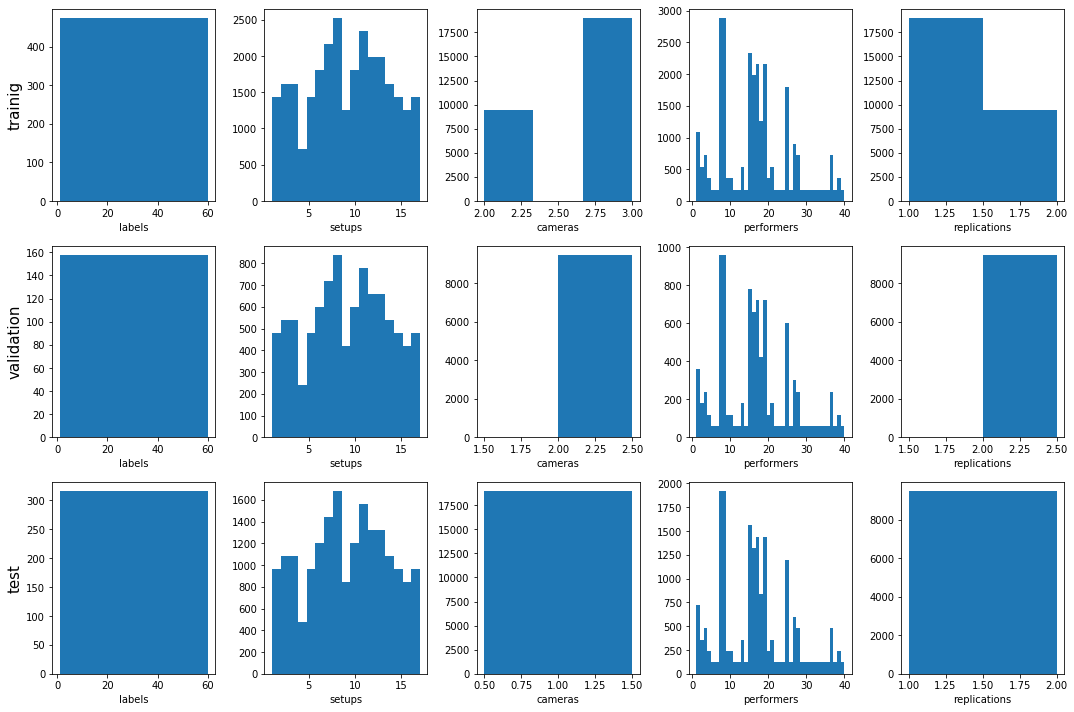

######## keypoint_rcnn_X_101_32x8d_FPN_3x-CROSS_SUBJECT-dataset.pickle #####################
Loading  /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/keypoint_rcnn_X_101_32x8d_FPN_3x-CROSS_SUBJECT-dataset.pickle


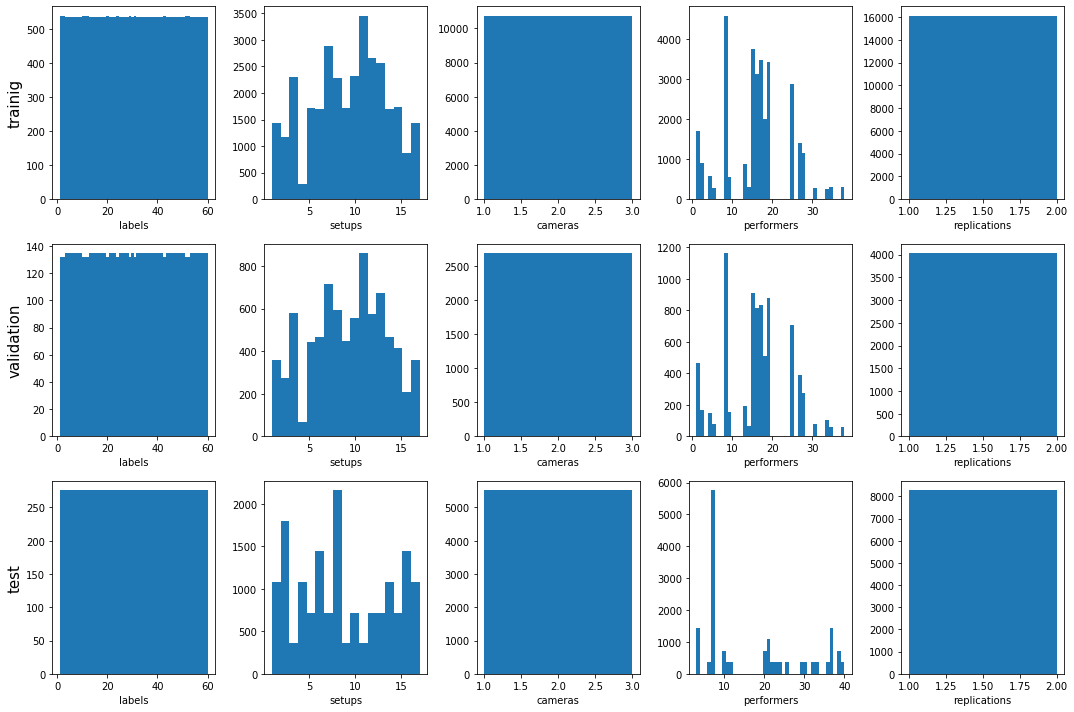

######## PoseNet-101-CROSS_VIEW-dataset.pickle #####################
Loading  /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/PoseNet-101-CROSS_VIEW-dataset.pickle


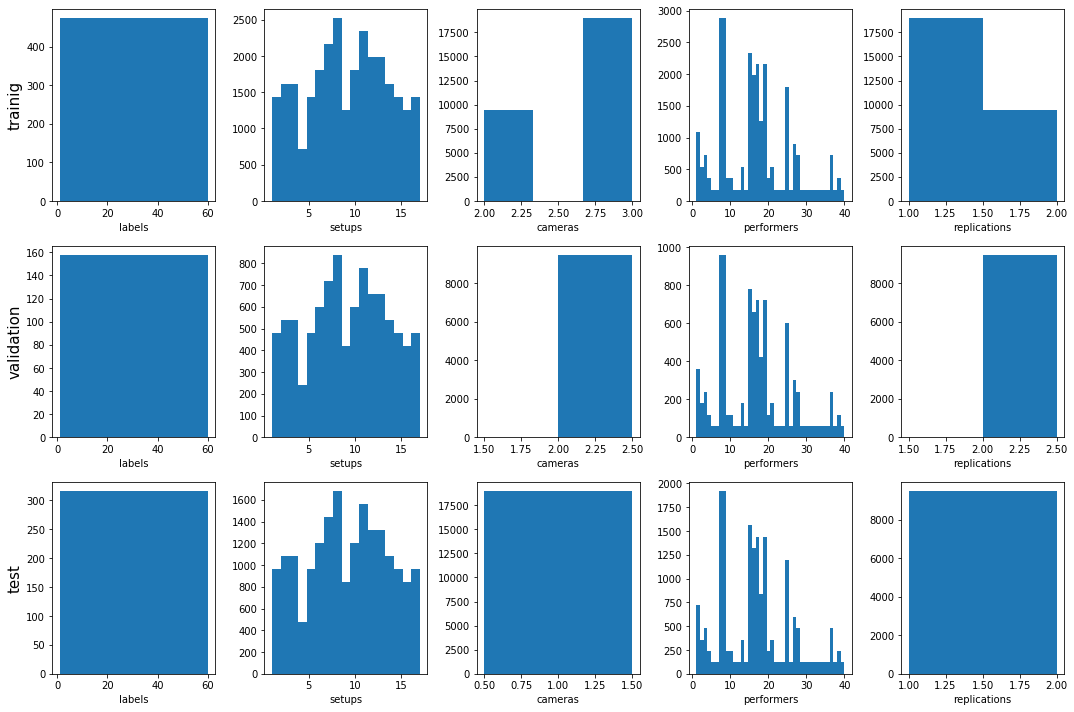

######## PoseNet-101-CROSS_SUBJECT-dataset.pickle #####################
Loading  /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/PoseNet-101-CROSS_SUBJECT-dataset.pickle


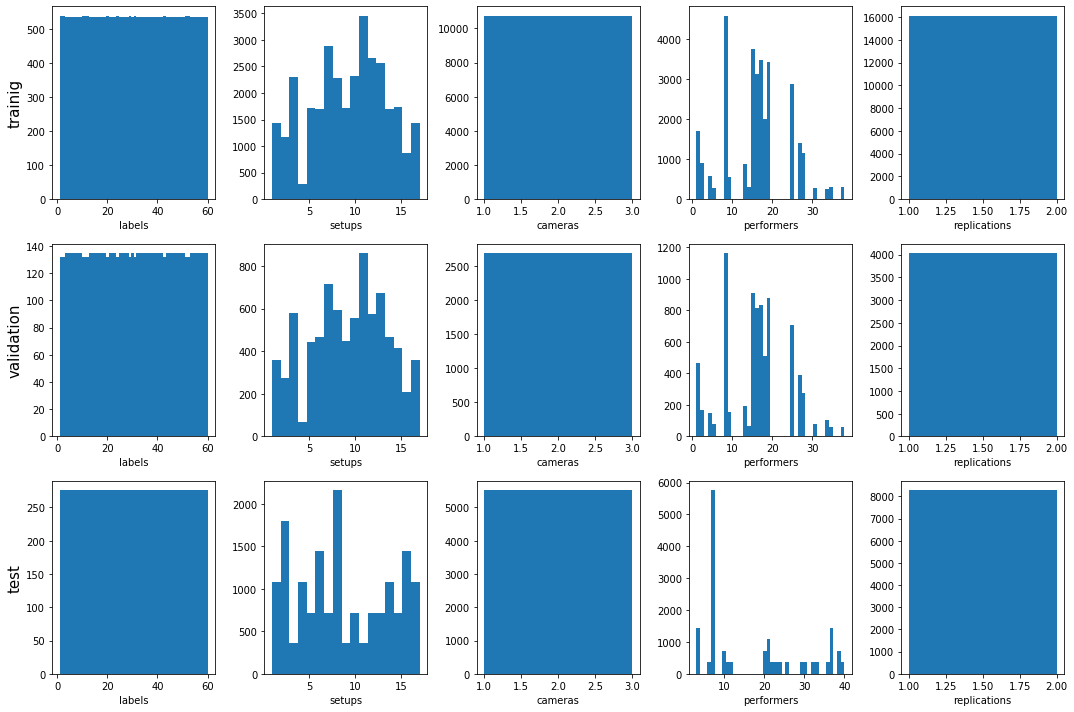

In [14]:
import matplotlib.pyplot as plt
import pickle

type_of_cross_subj_dataset = "CROSS_SUBJECT-dataset.pickle"
type_of_cross_view_dataset = "CROSS_VIEW-dataset.pickle"

DATASET_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/"
datasetNames = [
    "keypoint_rcnn_X_101_32x8d_FPN_3x-"+type_of_cross_view_dataset,
    "keypoint_rcnn_X_101_32x8d_FPN_3x-"+type_of_cross_subj_dataset,
    "PoseNet-101-"+type_of_cross_view_dataset,
    "PoseNet-101-"+type_of_cross_subj_dataset
]

for datasetName in datasetNames:
    print("######## {} #####################".format(datasetName))
    datasetPath = DATASET_FOLDER+datasetName
    print("Loading ",datasetPath)
    with open(datasetPath,"rb") as file_in:
            read_train_set, read_val_set, read_test_set = pickle.load(file_in)


    xLabels = ["labels", "setups", "cameras", "performers", "replications"]
    yLabels = ["trainig", "validation", "test"]
    fig, axes = plt.subplots(nrows=3, ncols=5)
    fig.set_size_inches(15,10)
    for ids, dataSet in enumerate([read_train_set, read_val_set, read_test_set]):
        axes[ids][0].set_ylabel(yLabels[ids],fontsize = 15)
        for iid, data in enumerate(dataSet[1:]):
            axes[ids][iid].set_xlabel(xLabels[iid],fontsize = 10)
            axes[ids][iid].hist(data, bins = max(data))
    fig.tight_layout()
    plt.show()

## Re-split, display and save dataset

######## keypoint_rcnn_X_101_32x8d_FPN_3x-CROSS_VIEW-dataset.pickle #####################
Loading  /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/keypoint_rcnn_X_101_32x8d_FPN_3x-CROSS_VIEW-dataset.pickle
## Spliting Cross-view dataset for the first time ####
## Check correctness of Cross-view dataset ####
## All correct! ##


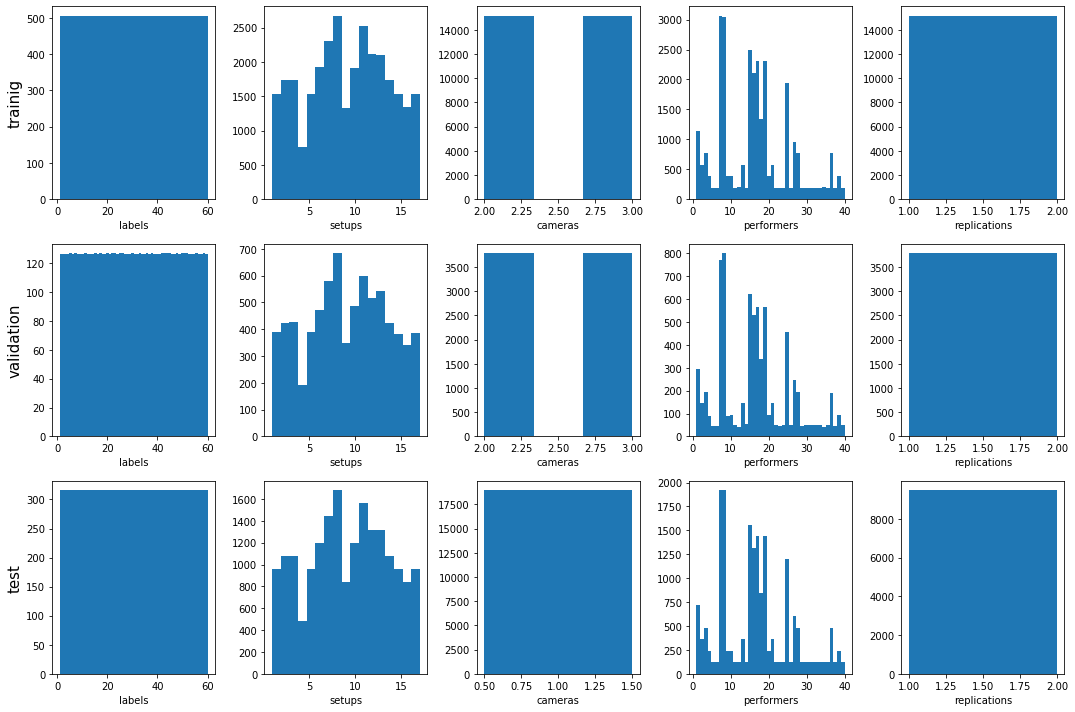

Overwriting /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/keypoint_rcnn_X_101_32x8d_FPN_3x-CROSS_VIEW-dataset.pickle
######## keypoint_rcnn_X_101_32x8d_FPN_3x-CROSS_SUBJECT-dataset.pickle #####################
Loading  /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/keypoint_rcnn_X_101_32x8d_FPN_3x-CROSS_SUBJECT-dataset.pickle
## Spliting Cross-subject dataset for the first time ####
## Check correctness of Cross-subject dataset ####
## All correct! ##


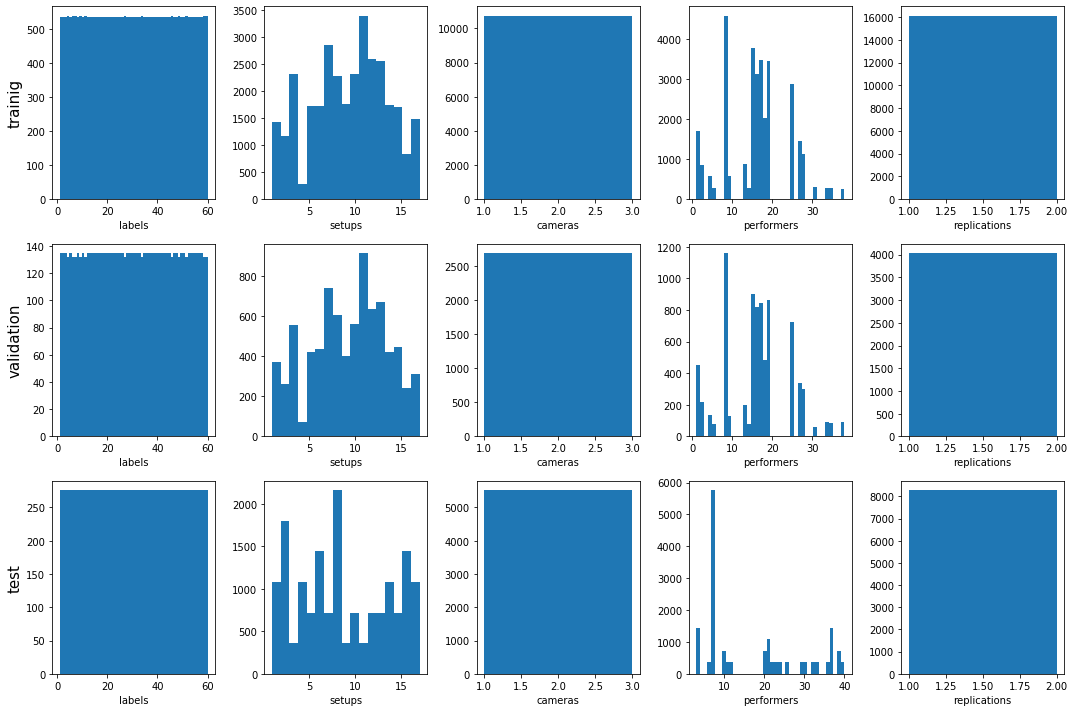

Overwriting /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/keypoint_rcnn_X_101_32x8d_FPN_3x-CROSS_SUBJECT-dataset.pickle
######## PoseNet-101-CROSS_VIEW-dataset.pickle #####################
Loading  /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/PoseNet-101-CROSS_VIEW-dataset.pickle
## Spliting Cross-view as the previous one ####
## Check correctness of Cross-view dataset ####
## All correct! ##


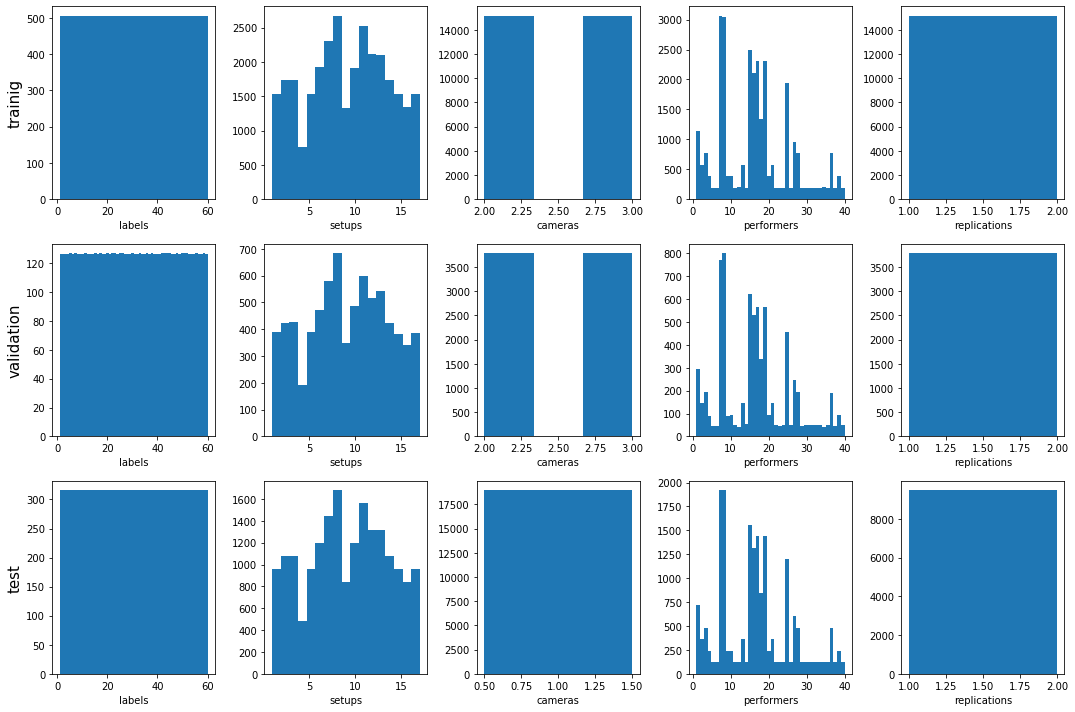

Overwriting /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/PoseNet-101-CROSS_VIEW-dataset.pickle
######## PoseNet-101-CROSS_SUBJECT-dataset.pickle #####################
Loading  /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/PoseNet-101-CROSS_SUBJECT-dataset.pickle
## Spliting Cross-subject as the previous one ####
## Check correctness of Cross-subject dataset ####
## All correct! ##


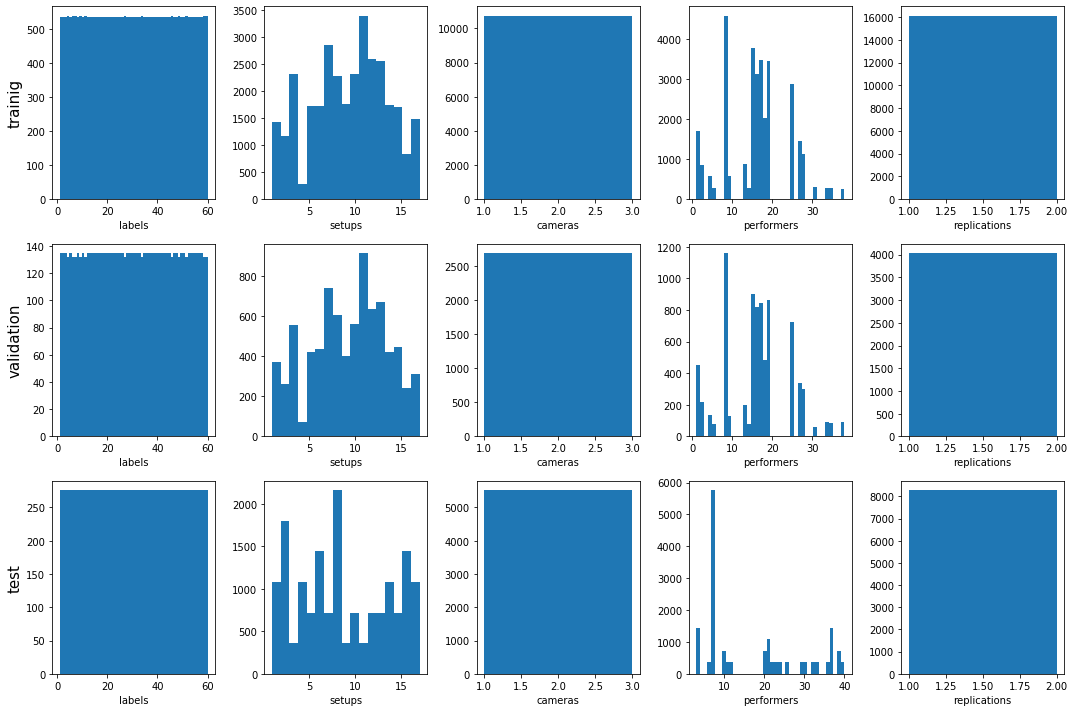

Overwriting /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/PoseNet-101-CROSS_SUBJECT-dataset.pickle


In [59]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

VALIDATION_SET_PERCENTAGE = 0.20

type_of_cross_subj_dataset = "CROSS_SUBJECT-dataset.pickle"
type_of_cross_view_dataset = "CROSS_VIEW-dataset.pickle"

DATASET_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/"
datasetNames = [
    "keypoint_rcnn_X_101_32x8d_FPN_3x-"+type_of_cross_view_dataset,
    "keypoint_rcnn_X_101_32x8d_FPN_3x-"+type_of_cross_subj_dataset,
    "PoseNet-101-"+type_of_cross_view_dataset,
    "PoseNet-101-"+type_of_cross_subj_dataset
]

idx_training_CV = []
idx_validation_CV = []
idx_training_CS = []
idx_validation_CS = []
for datasetName in datasetNames:
    print("######## {} #####################".format(datasetName))
    datasetPath = DATASET_FOLDER+datasetName
    print("Loading ",datasetPath)
    with open(datasetPath,"rb") as file_in:
            read_train_set, read_val_set, read_test_set = pickle.load(file_in)
    
    ### MERGING TRAINING AND VALIDATION SET #####
    train_val_set = np.concatenate((read_train_set, read_val_set),axis=1)
    featuresTV, labelsTV, setupsTV, camerasTV, performersTV, replicationsTV = train_val_set
    
    ### CROSS VIEW splitting ######
    if datasetName.endswith("-CROSS_VIEW-dataset.pickle"):
        ## splitting by piking always one frontal view among the 4 videos awailable (per setup-action-performer)
        ## and piking sa validation set half views from camera 2 and half view from camera 3 
        if len(idx_training_CV) == 0:
            print("## Spliting Cross-view dataset for the first time ####")
            c2r2MomentsList = [] #frontal view camera 2
            c3r1MomentsList = [] #frontal view camera 3
            for i in range(len(labelsTV)):
                moment = (labelsTV[i], setupsTV[i], camerasTV[i], performersTV[i], replicationsTV[i])
                if camerasTV[i] == 2 and replicationsTV[i] == 2:
                    c2r2MomentsList.append(moment)
                elif camerasTV[i] == 3 and replicationsTV[i] == 1:
                    c3r1MomentsList.append(moment)
                    
            half_validation_set_size = int(len(labelsTV)*VALIDATION_SET_PERCENTAGE/2)
            
            sssCvHalf = StratifiedShuffleSplit(n_splits=1, test_size=half_validation_set_size)
            for train_idx, val_idx in sssCvHalf.split(c2r2MomentsList, [m[0] for m in c2r2MomentsList]):
                val_moments = [c2r2MomentsList[i] for i in val_idx]
                
            # removing from the view from camera 3 the candidates already choose from camera 2
            [c3r1MomentsList.remove((l,s,3,p,1)) for (l,s,c,p,r) in val_moments]
            
            for train_idx, val_idx in sssCvHalf.split(c3r1MomentsList, [m[0] for m in c3r1MomentsList]):
                val_moments = val_moments + [c3r1MomentsList[i] for i in val_idx] 
            
            for i in range(len(labelsTV)):
                moment = (labelsTV[i], setupsTV[i], camerasTV[i], performersTV[i], replicationsTV[i])
                if moment in val_moments:
                    idx_validation_CV.append(i)
                else:
                    idx_training_CV.append(i)                 
        else:
            print("## Spliting Cross-view as the previous one ####")
            
        idx_validation = np.asarray(idx_validation_CV)
        idx_training = np.asarray(idx_training_CV)
    
    #### CROSS SUBJECT splitting ####
    elif datasetName.endswith("-CROSS_SUBJECT-dataset.pickle"):
        ## splitting by different "moments"
        if len(idx_training_CS) == 0:
            print("## Spliting Cross-subject dataset for the first time ####")
            moments=set()
            for i in range(len(labelsTV)):
                moments.add((labelsTV[i], setupsTV[i], performersTV[i], replicationsTV[i]))
            moments = list(moments)            
            momentsActions = [m[0] for m in moments]
            
            sss = StratifiedShuffleSplit(n_splits=1, test_size=VALIDATION_SET_PERCENTAGE)
            for train_idx, val_idx in sss.split(moments, momentsActions):
                val_moments = [moments[i] for i in val_idx] 
            
            for i in range(len(labelsTV)):
                moment = (labelsTV[i], setupsTV[i], performersTV[i], replicationsTV[i])
                if moment in val_moments:
                    idx_validation_CS.append(i)
                else:
                    idx_training_CS.append(i)     
        else:
            print("## Spliting Cross-subject as the previous one ####")
            
        idx_validation = np.asarray(idx_validation_CS)
        idx_training = np.asarray(idx_training_CS)
    else:
        raise Exception("dataset not recognised.")
        
    trainSet = [[] for i in range(6)]
    valSet = [[] for i in range(6)]
    for i in range(len(train_val_set)):
        valSet[i] = train_val_set[i][idx_validation]
        trainSet[i] = train_val_set[i][idx_training]
        
    ## CHECK CORRECTNESS OF SPLITTING  
    if datasetName.endswith("-CROSS_VIEW-dataset.pickle"):
        print("## Check correctness of Cross-view dataset ####")
        trainMoments = [(trainSet[1][i],trainSet[2][i],trainSet[3][i],trainSet[4][i],trainSet[5][i]) for i in range(len(trainSet[0]))]
        valMoments = [(valSet[1][i],valSet[2][i],valSet[3][i],valSet[4][i],valSet[5][i]) for i in range(len(valSet[0]))]
        for (l,s,c,p,r) in valMoments:
            # CHECK on camera
            if c == 2 and r == 2:
                assert (l,s,3,p,1) in trainMoments
                assert (l,s,3,p,2) in trainMoments
                assert (l,s,2,p,1) in trainMoments
            elif c == 3 and r == 1:
                assert (l,s,3,p,2) in trainMoments
                assert (l,s,2,p,2) in trainMoments
                assert (l,s,2,p,1) in trainMoments
            else:
                raise Exception("val moment incorrect")
        print("## All correct! ##")
    else:
        print("## Check correctness of Cross-subject dataset ####" )
        trainMoments = [(trainSet[1][i],trainSet[2][i],trainSet[4][i],trainSet[5][i]) for i in range(len(trainSet[0]))]
        valMoments = [(valSet[1][i],valSet[2][i],valSet[4][i],valSet[5][i]) for i in range(len(valSet[0]))]
        # CHECK that none of the cameras of each validation moment are in the train set
        for (l,s,p,r) in valMoments:
            assert (l,s,3,p,r) not in trainMoments
            assert (l,s,2,p,r) not in trainMoments
            assert (l,s,1,p,r) not in trainMoments
        print("## All correct! ##")
        
    xLabels = ["labels", "setups", "cameras", "performers", "replications"]
    yLabels = ["trainig", "validation", "test"]
    fig, axes = plt.subplots(nrows=3, ncols=5)
    fig.set_size_inches(15,10)
    
    for ids, dataSet in enumerate([trainSet, valSet, read_test_set]):
        axes[ids][0].set_ylabel(yLabels[ids],fontsize = 15)
        for iid, data in enumerate(dataSet[1:]):
            axes[ids][iid].set_xlabel(xLabels[iid],fontsize = 10)
            axes[ids][iid].hist(data, bins = max(data))
    fig.tight_layout()
    plt.show()
#     print("Overwriting", datasetPath)
#     with open(datasetPath, 'wb') as handle:
#         pickle.dump((trainSet, valSet, read_test_set), handle, protocol=pickle.HIGHEST_PROTOCOL)